In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)


{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [3]:
import pandas as pd
pd.DataFrame(X).head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [4]:
pd.set_option('display.max_columns', None)
df = pd.concat([X, y], axis=1)
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


In [5]:
df.shape

(8124, 23)

## Dataset Downloading

In [6]:
# @title Kaggle Competition Data Downloading  { display-mode: "form",run :"auto" }
# @markdown Put the competition name
kaggle_username = 'Kaggle_Username'     # @param ['Kaggle_Username', 'kaggle_username', 'kaggle_2']
kaggle_token = "Kaggle"     # @param ["Kaggle", 'kaggle', 'kaggle_2_pass']

project_name = 'playground-series-s4e8'  # @param {type: "string"}


from google.colab import userdata
from IPython import display
import os
token = {"username":userdata.get(kaggle_username),"key":userdata.get(kaggle_token)}
import os, json
os.environ['KAGGLE_CONFIG_DIR']='.'
with open('kaggle.json', "w") as f:
    json.dump(token, f)
!chmod 600 ./kaggle.json
!kaggle competitions download -c $project_name
filename = project_name + ".zip"
!unzip $filename && rm $filename
os.environ['MLFLOW_TRACKING_PASSWORD'] = userdata.get('MLFLOW_TRACKING_PASSWORD')
os.environ['MLFLOW_TRACKING_USERNAME'] = userdata.get('MLFLOW_TRACKING_USERNAME')
display.clear_output()
print("Files have been downloaded!")

Files have been downloaded!


In [7]:
# !kaggle datasets download santanukundu/poisonous-mushrooms-detection && unzip *.zip && rm -d *.zip

In [8]:
!pip install optuna-dashboard optuna
!pip install mlflow dagshub
!pip install catboost
!mkdir -p output/models output/plots output/logs output/full_models
!pip install --upgrade gdown
display.clear_output()
import dagshub
import mlflow
import optuna

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson,kstest, shapiro
from IPython.display import Audio,display
from IPython.display import clear_output

from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import matthews_corrcoef, accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge

from tqdm.auto import tqdm
import pickle

In [11]:
from sklearn.metrics import (confusion_matrix, accuracy_score,
                             precision_score, f1_score, recall_score,
                             roc_auc_score, roc_curve, auc
                             )
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import VALID_METRICS

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (AdaBoostClassifier, ExtraTreesClassifier,
                              BaggingClassifier, RandomForestClassifier,
                              GradientBoostingClassifier,
                              HistGradientBoostingClassifier,
                              StackingClassifier
                              )
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier

In [12]:
# plotly libraries setup
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = "colab"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
# import plotly.offline as pyo
# pyo.init_notebook_mode()

In [13]:
repo = "SantanuK/Kaggle-Competitions-Lab"
dagshub.init("Kaggle-Competitions-Lab", "SantanuK", mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=827408fa-6e9e-4ecf-b6e5-37d33fb242f3&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=db2bdf0e56004b325c1ea027de716c6c27fb6006741b6ae849a7229a5c59d4e5




Accessing as SantanuK

Initialized MLflow to track repo "SantanuK/Kaggle-Competitions-Lab"

Repository SantanuK/Kaggle-Competitions-Lab initialized!

In [14]:
experiment_name = 'Binary Prediction of Poisonous Mushrooms'
try:
    mlflow.create_experiment(experiment_name)
    mlflow.set_experiment(experiment_name)
except Exception as e:
    mlflow.set_experiment(experiment_name)
    # print("Experiment has been created or some issue occured!\n","Error: ", e )

## Dataset

In [52]:
df_train = pd.read_csv('train.csv').drop('id',axis=1)
df_test = pd.read_csv('test.csv').drop('id',axis=1)
# df_extra = pd.read_csv('original.csv')

In [ ]:
print(f"""The number of features: {df_test.shape[1]}
-----------------
Training DataSet
-----------------
The number of samples:              {df_train.shape[0]}
The number of duplicated samples:   {df_train.duplicated().sum()}
The number of null samples:         {df_train.isna().sum().sum()} ({round(df_train.isna().sum().sum()/df_train.shape[0]*100,2)}%)
The number of unique samples:       {df_train.nunique().sum()}

-----------------
Testing DataSet
-----------------
The number of samples:              {df_test.shape[0]}
The number of duplicated samples:   {df_test.duplicated().sum()}
The number of null samples:         {df_test.isna().sum().sum()}({round(df_test.isna().sum().sum()/df_test.shape[0]*100,2)}%)
The number of unique samples:       {df_test.nunique().sum()}

""")

The number of features: 20
-----------------
Training DataSet
-----------------
The number of samples:              3116945
The number of duplicated samples:   0
The number of null samples:         15868508 (509.1%)
The number of unique samples:       13304

-----------------
Testing DataSet
-----------------
The number of samples:              2077964
The number of duplicated samples:   0
The number of null samples:         10579477(509.13%)
The number of unique samples:       12689




In [ ]:
df_train.shape, df_test.shape

((3116945, 21), (2077964, 20))

In [ ]:
df_train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [116]:
# feature = 'spore-print-color'
# df_train[feature].value_counts()
# df[feature].value_counts()

In [68]:
def missing_values_table(dataframe):
    x = dataframe.isna().sum()/len(dataframe)*100
    x = x.reset_index()
    x.columns = ['feature', 'percentage-of-null']
    x = x.sort_values(by='percentage-of-null', ascending=False).reset_index(drop=True)
    x['unique'] = [dataframe[i].nunique() for i in x['feature']]
    x['unique-vals'] = [",".join (sorted(map(str,dataframe[i].unique()))) for i in x['feature']]
    # return x[x['percentage-of-null']>0]
    return x

In [113]:
# missing_values_table(df_train)
tmp = missing_values_table(train)
cols = ['stem-width','stem-height','cap-diameter']
tmp[~tmp['feature'].isin(cols)]

,feature,percentage-of-null,unique,unique-vals
0,class,0.0,2,"e,p"
1,stem-root,0.0,5,"b,c,f,r,s"
2,habitat,0.0,8,"d,g,h,l,m,p,u,w"
3,spore-print-color,0.0,7,"g,k,n,p,r,u,w"
4,ring-type,0.0,8,"e,f,g,l,m,p,r,z"
5,has-ring,0.0,2,"f,t"
6,veil-color,0.0,6,"e,k,n,u,w,y"
7,veil-type,0.0,1,u
8,stem-color,0.0,13,"b,e,f,g,k,l,n,o,p,r,u,w,y"
9,stem-surface,0.0,8,"f,g,h,i,k,s,t,y"


In [70]:
tmp = missing_values_table(test)
cols = ['stem-width','stem-height','cap-diameter']
tmp[~tmp['feature'].isin(cols)]

,feature,percentage-of-null,unique,unique-vals
1,cap-shape,0.0,23,"a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,w,x,y,z"
2,habitat,0.0,23,"a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,w,x,y,z"
3,spore-print-color,0.0,22,"a,b,c,d,e,f,g,h,i,k,l,n,o,p,r,s,t,u,w,x,y,z"
4,ring-type,0.0,23,"a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,w,x,y,z"
5,has-ring,0.0,22,"a,b,c,d,e,f,g,h,i,k,l,m,o,p,r,s,t,u,w,x,y,z"
6,veil-color,0.0,21,"a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,w,y"
7,veil-type,0.0,14,"a,b,c,e,g,k,l,m,n,p,s,u,w,y"
8,stem-color,0.0,23,"a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,w,x,y,z"
9,stem-surface,0.0,23,"a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,w,x,y,z"
10,stem-root,0.0,23,"a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,w,x,y,z"


### Sandbox

In [115]:
feature = 'habitat'
# train[feature].value_counts()
test[feature].value_counts()

,count
habitat,
d,1450729
g,304300
l,114458
m,101258
h,80032
w,12324
p,11429
u,3434


In [ ]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')

In [ ]:
set(df_train.columns) - set(df.columns)

{'cap-diameter',
 'class',
 'does-bruise-or-bleed',
 'has-ring',
 'season',
 'stem-color',
 'stem-height',
 'stem-root',
 'stem-surface',
 'stem-width'}

In [ ]:
common_features = set(df_train.columns) & set(df.columns)
common_features

{'cap-color',
 'cap-shape',
 'cap-surface',
 'gill-attachment',
 'gill-color',
 'gill-spacing',
 'habitat',
 'ring-type',
 'spore-print-color',
 'veil-color',
 'veil-type'}

1. `cap-diameter`, `class`, `season` are new features.
2. some equivalent fatures.

| feature of `df_train` | feature of `df` |
|-----------------------|-----------------|
|does-bruise-or-bleed|bruises|
|has-ring|ring-number|
|stem-color|stalk-color-above-ring, stalk-color-below-ring|
|stem-height||
|stem-root||
|stem-surface||
|stem-width||

In [53]:
def preprocess_categorical_data(df, df_t):
    """
    Preprocesses the DataFrame by replacing non-alphabetical characters in categorical columns
    and imputing missing values in categorical columns using mode and in numeric columns using median.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - pd.DataFrame: The processed DataFrame.
    """
    def replace_non_alphabetical(value):
        """Replaces non-alphabetical values with NaN if they are not a single character."""
        if isinstance(value, str) and (len(value) == 1 and value.isalpha()):
            return value
        return np.nan

    # Identify categorical and numeric columns
    categorical_columns = df_t.select_dtypes(include=['object']).columns
    numeric_columns = df_t.select_dtypes(include=[np.number]).columns

    # Replace non-alphabetical values with NaN in categorical columns
    for col in categorical_columns:
        df[col] = df[col].apply(replace_non_alphabetical)
        df_t[col] = df_t[col].apply(replace_non_alphabetical)

    # Impute missing values in categorical columns using mode
    for col in categorical_columns:
        if df[col].isnull().any():
            mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'  # Safe mode handling
            df[col].fillna(mode_value, inplace=True)
            df_t[col].fillna(mode_value, inplace=True)

    # Impute missing values in numeric columns using median
    for col in numeric_columns:
        median_value = df[col].median()
        if df[col].isnull().any():
            df[col].fillna(median_value, inplace=True)
        df_t[col].fillna(median_value, inplace=True)

    return df, df_t




In [54]:
# Data Visualization and Analysis
# Numerical and Categorical visualization
def visualize_categorical_distributions(df):
    """
    Visualizes the distribution of categorical features in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the categorical features to visualize.

    Returns:
    - None: Displays the plots.
    """
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns

    # Set up the figure for multiple subplots
    num_cols = 3  # Number of columns for the subplot grid
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
    fig.suptitle('Distribution of Categorical Features', fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each categorical column and create a bar plot
    for i, col in enumerate(categorical_columns):
        sns.barplot(
            x=df[col].value_counts().index,
            y=df[col].value_counts().values,
            ax=axes[i],
            palette="viridis"
        )
        # Setting titles and labels
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Count', fontsize=12)
        axes[i].tick_params(axis='x')

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()

def visualize_numerical_distributions(df, exclude_columns='id'):
    """
    Visualizes the distribution of numerical features in the DataFrame using histograms and KDE plots,
    excluding specified columns.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the numerical features to visualize.
    - exclude_columns (list): List of column names to exclude from visualization.

    Returns:
    - None: Displays the plots.
    """
    # Ensure exclude_columns is a list
    if exclude_columns is None:
        exclude_columns = []

    # Identify numerical columns and exclude specified ones
    numerical_columns = df.select_dtypes(include=['number']).columns
    numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

    # Set up the figure for multiple subplots
    num_cols = 3  # Number of columns for the subplot grid
    num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    fig.suptitle('Distribution of Numerical Features', fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each numerical column and create a histogram with KDE
    for i, col in enumerate(numerical_columns):
        sns.histplot(df[col], kde=True, ax=axes[i], color="skyblue", element="step", stat="density")
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel('Density', fontsize=12)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()


In [55]:
# Apply the functions to train and test data
print("Imputing noise with mode for categoricals and median for numericals...")
train, test = preprocess_categorical_data(df_train, df_test)


# Print summary of missing values after processing
print("\nMissing values in train_data after processing: ", train.isnull().sum().sum())
print("\nMissing values in test_data after processing: ", test.isnull().sum().sum())

Imputing noise with mode for categoricals and median for numericals...

Missing values in train_data after processing:  0

Missing values in test_data after processing:  0


In [ ]:
# test.isnull().sum()

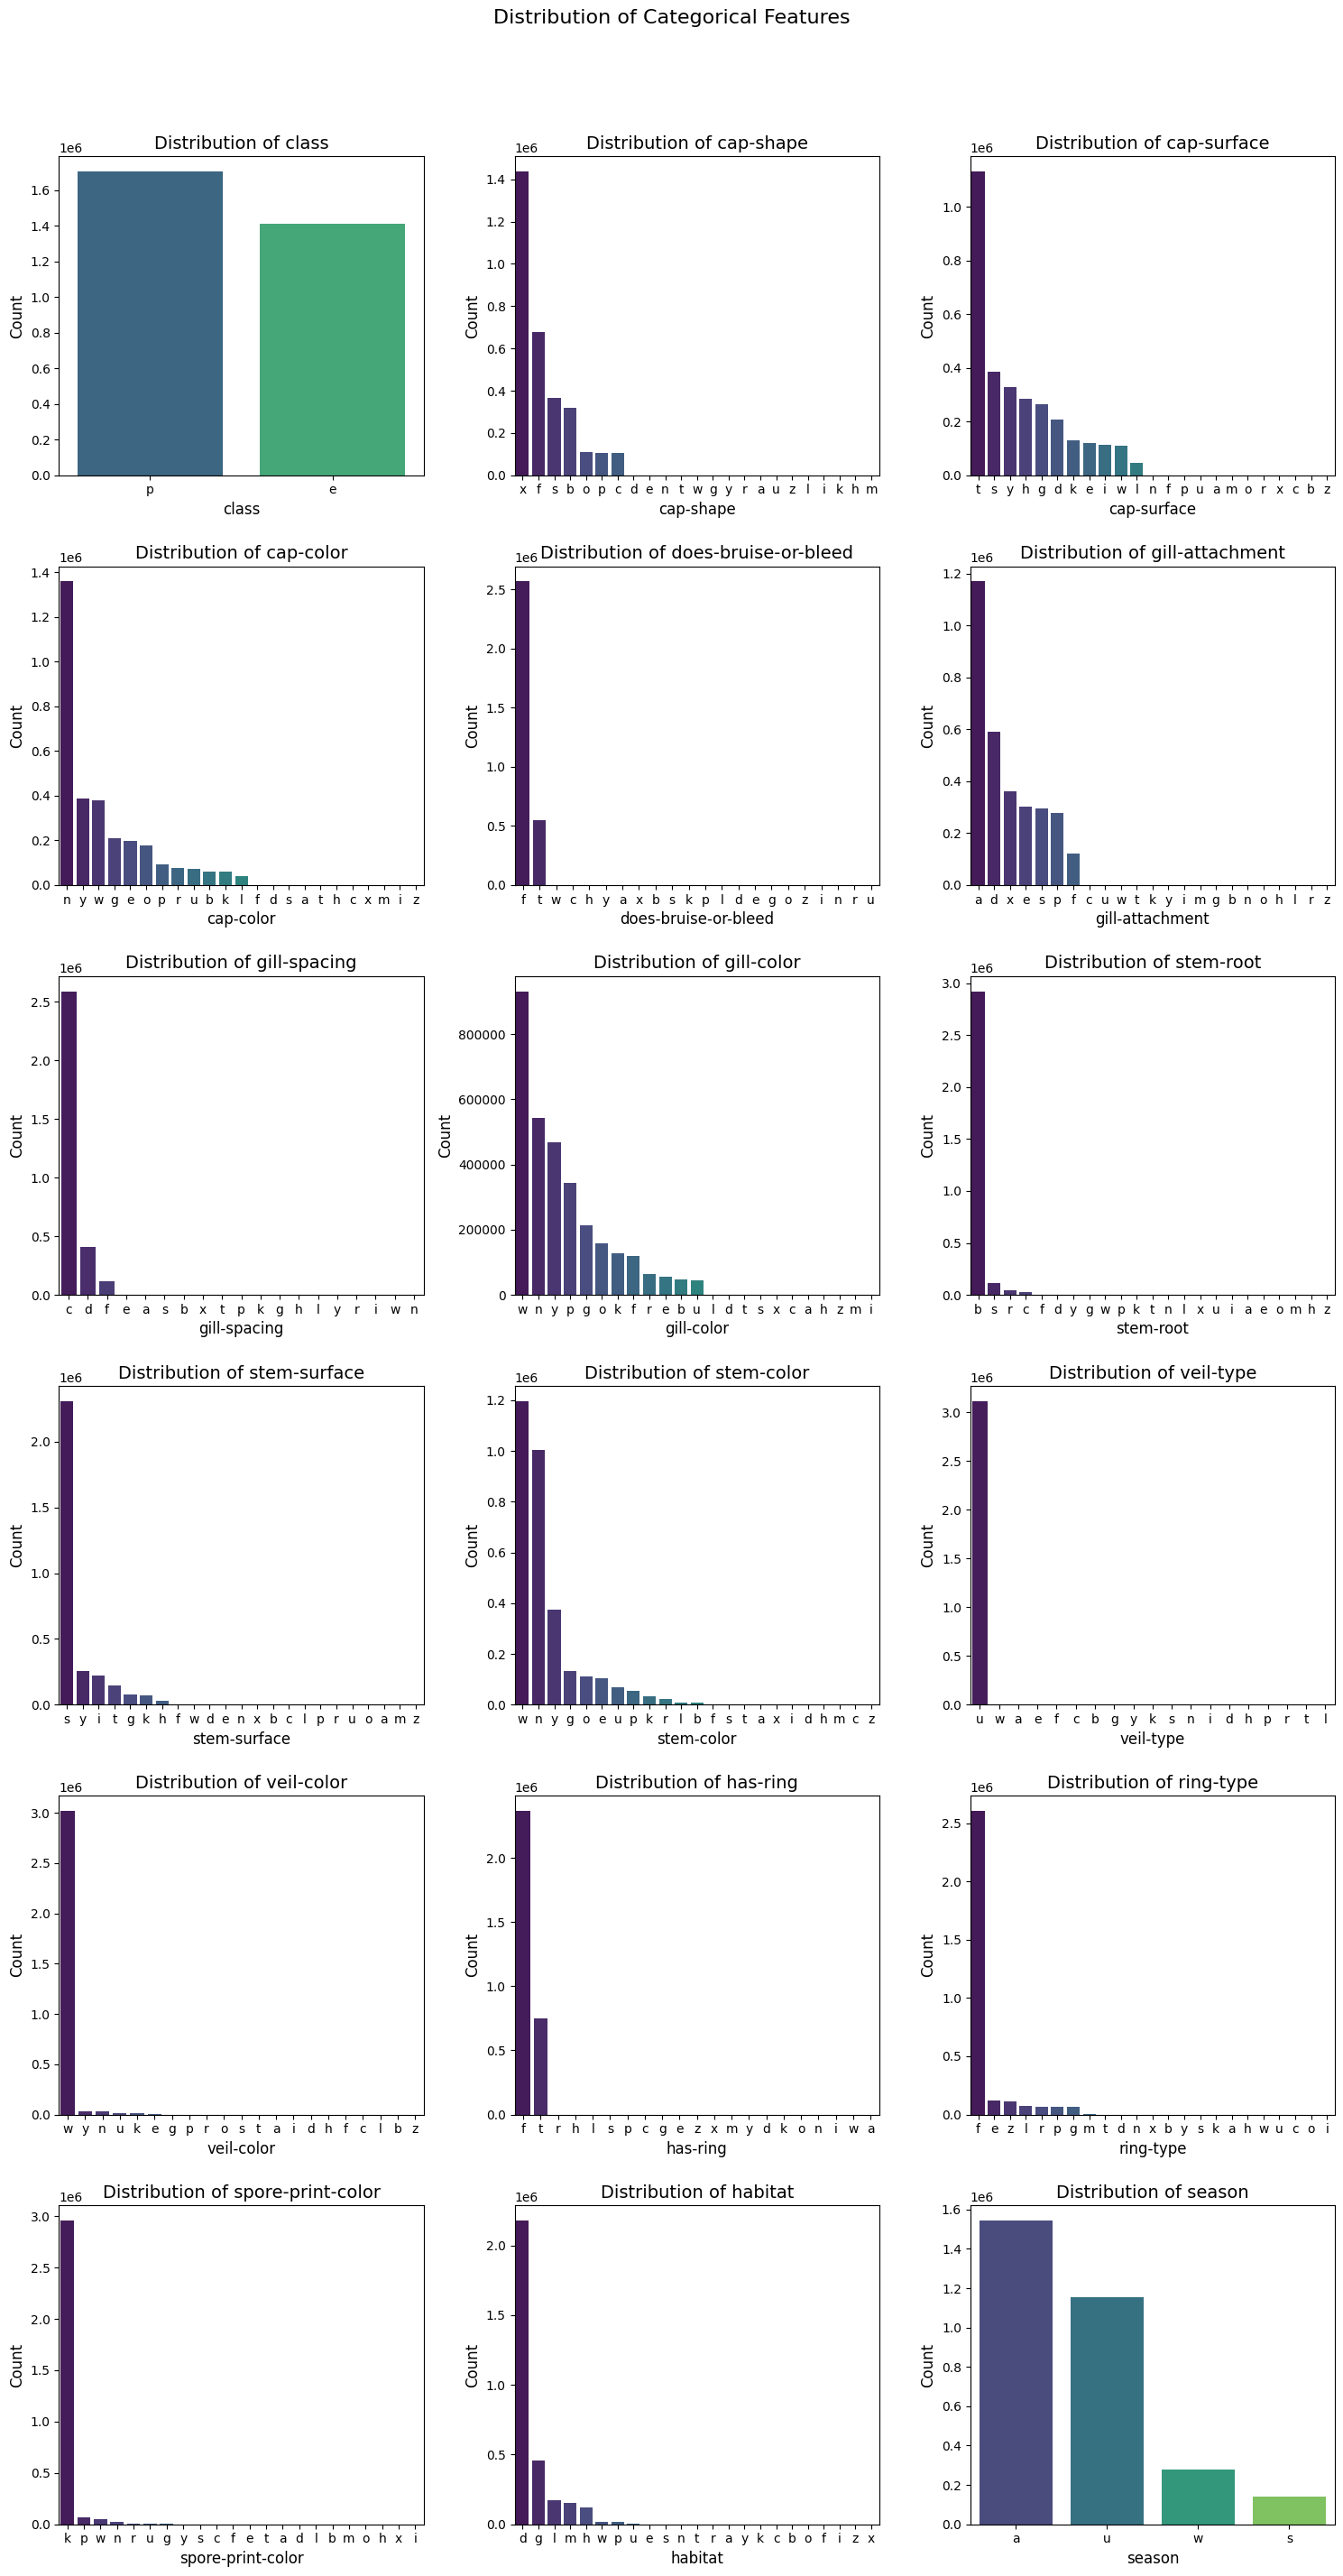

In [ ]:
import warnings
warnings.filterwarnings('ignore')
visualize_categorical_distributions(train);

In [66]:
def categorize_low_frequency_values(df_train, df_test, threshold=100):
    """
    Replaces categories with less than a given threshold in all categorical columns
    with the category 'Other', applying the same transformation to both training and test datasets.

    Parameters:
    - df_train (pd.DataFrame): The training DataFrame.
    - df_test (pd.DataFrame): The test DataFrame.
    - threshold (int): Frequency threshold below which categories are replaced with 'Other'.

    Returns:
    - df_train (pd.DataFrame): Modified training DataFrame.
    - df_test (pd.DataFrame): Modified test DataFrame.
    - mapping_dict (dict): Dictionary containing the mappings of replaced values for each column.
    """
    mapping_dict = {}

    # Identify categorical columns
    categorical_columns = df_train.select_dtypes(include=['object']).columns

    for col in categorical_columns:
        # Find values to replace
        value_counts = df_train[col].value_counts()
        values_to_replace = value_counts[value_counts < threshold].index

        # Determine the mode of the column
        mode_value = df_train[col].mode()[0]

        # Create mapping for the current column if there are values to replace
        if len(values_to_replace) > 0:
            # Store the mapping of original values to the mode
            mapping_dict[col] = {value: mode_value for value in values_to_replace}

            # Replace in training and test data
            df_train[col] = df_train[col].replace(values_to_replace, mode_value)
            df_test[col] = df_test[col].replace(values_to_replace, mode_value)

    return df_train, df_test, mapping_dict

In [110]:
train, test, mappings = categorize_low_frequency_values(train, test)

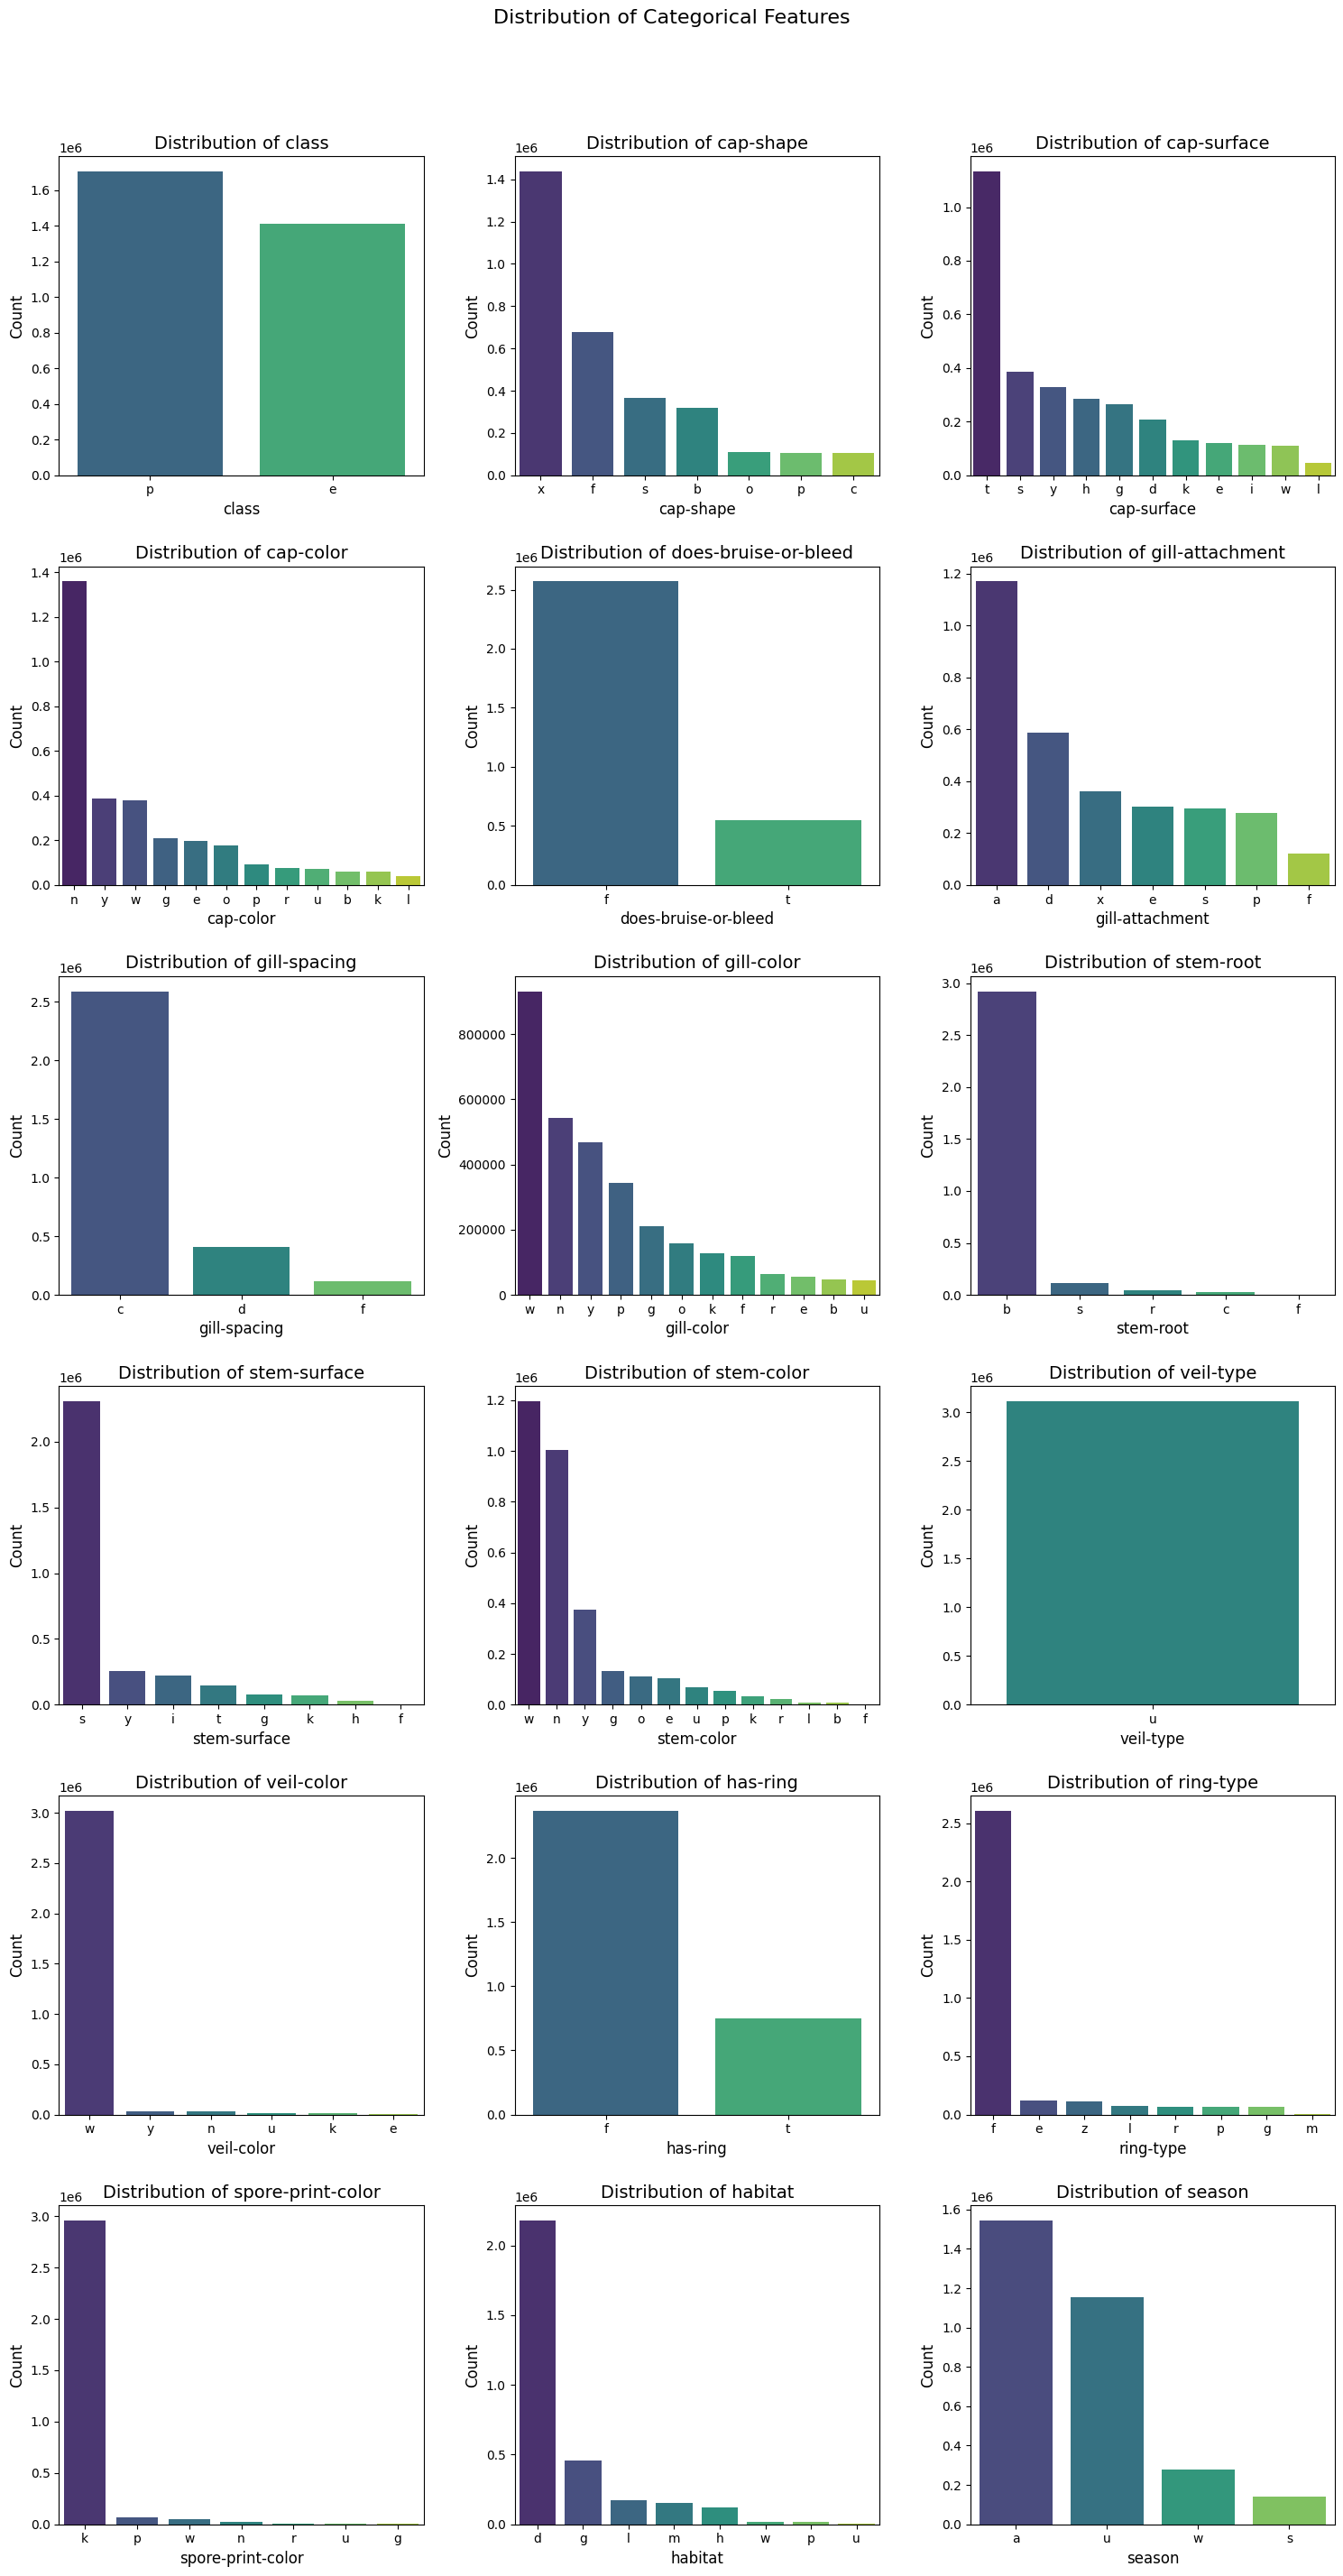

In [ ]:
visualize_categorical_distributions(train)

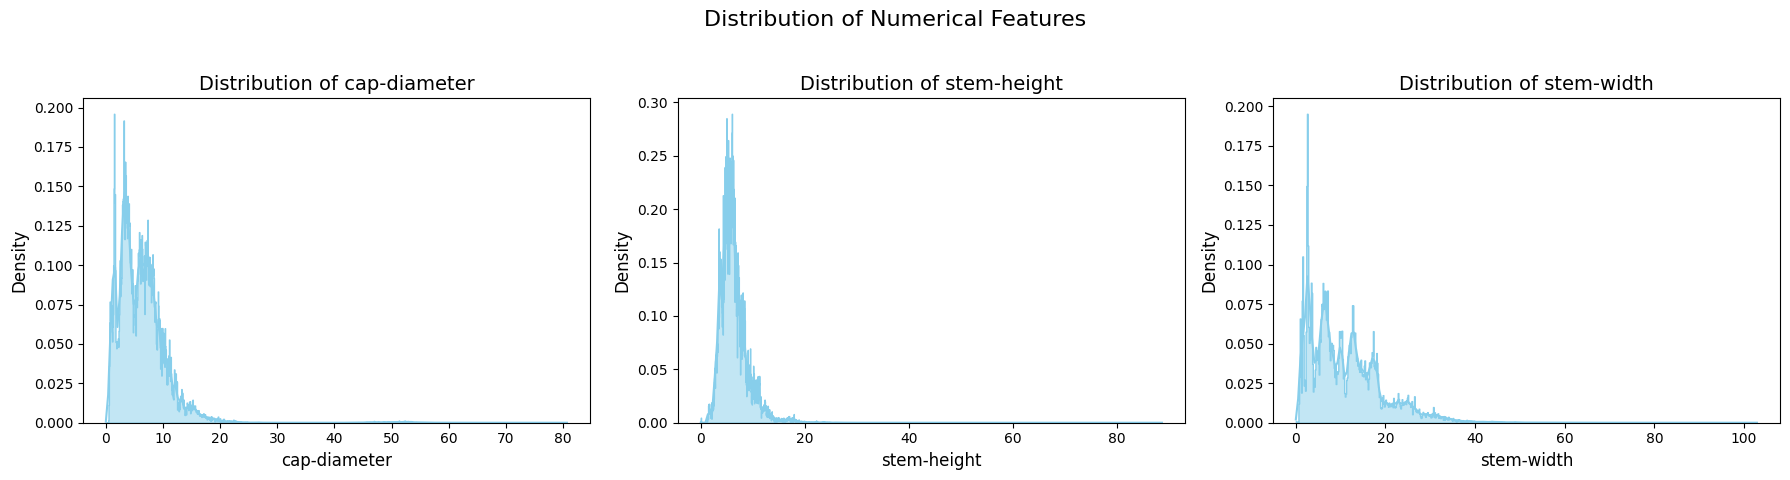

In [ ]:
visualize_numerical_distributions(train)

In [ ]:
from scipy.stats import boxcox
def handle_skewness(df, df_t, threshold=1.0):
    """
    Applies Box-Cox transformation to numerical columns in the DataFrame where skewness exceeds a threshold.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - threshold (float): Skewness threshold to decide which columns to transform.

    Returns:
    - pd.DataFrame: DataFrame with transformed columns.
    - dict: Dictionary of lambda values used for Box-Cox transformation for each column.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        skewness = df[col].skew()
        # Check the skewness and ensure positive values for Box-Cox
        if skewness > threshold:
            # Adding 1 to shift all data to positive if there are zero or negative values
            df[col] = df[col] + 1
            df[col], fitted_lambda = boxcox(df[col])
            df_t[col] = df_t[col] + 1
            df_t[col] = boxcox(df_t[col], lmbda=fitted_lambda)


    return df, df_t

# Example usage:
# df is your DataFrame containing the numerical data
train, test = handle_skewness(train, test)


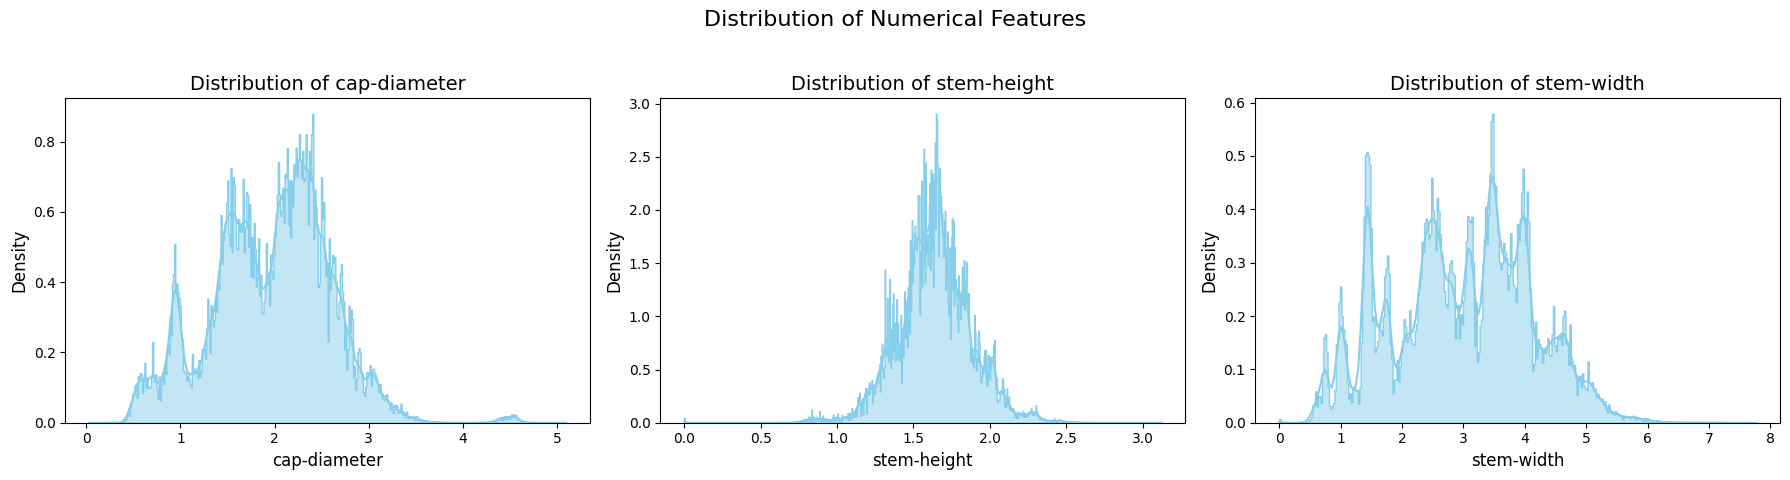

In [ ]:
visualize_numerical_distributions(train)

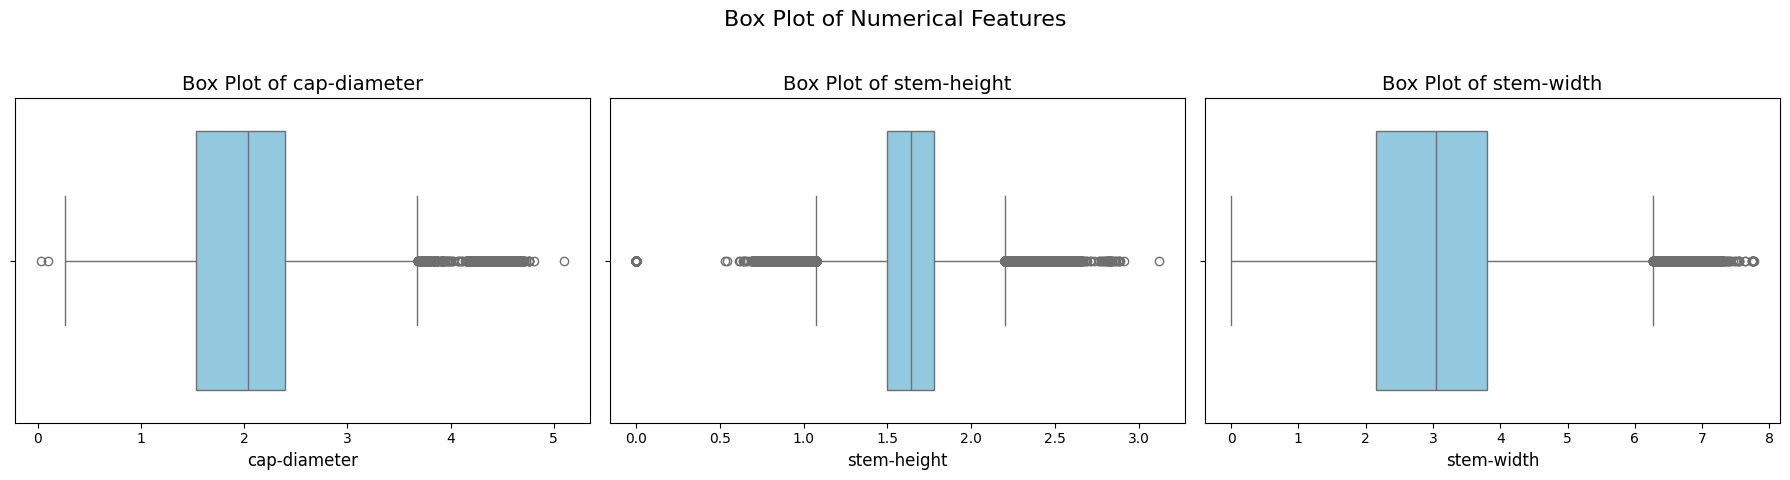

In [ ]:
def visualize_box_plots(df):
    """
    Visualizes the distribution of numerical features in the DataFrame using box plots to identify outliers.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the numerical features to visualize.

    Returns:
    - None: Displays the box plots.
    """
    # Identify numerical columns
    numerical_columns = df.select_dtypes(include=['number']).columns

    # Set up the figure for multiple subplots
    num_cols = 3  # Number of columns for the subplot grid
    num_rows = (len(numerical_columns) + num_cols - 1) // num_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
    fig.suptitle('Box Plot of Numerical Features', fontsize=16)

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Iterate over each numerical column and create a box plot
    for i, col in enumerate(numerical_columns):
        sns.boxplot(x=df[col], ax=axes[i], color="skyblue")
        axes[i].set_title(f'Box Plot of {col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)

    # Remove unused axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the main title space
    plt.show()

visualize_box_plots(train)

In [ ]:
def calculate_outliers_percentage(df):
    """
    Calculates the percentage of data considered outliers based on the IQR method for each numerical column.

    Parameters:
    - df (pd.DataFrame): DataFrame to analyze.

    Returns:
    - None: Prints the percentage of outliers for each numerical column.
    """
    outlier_counts = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Calculate outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    # Print the percentage of outliers for each column
    for column in outlier_counts:
        percentage = (outlier_counts[column] / len(df)) * 100
        print(f"Percentage of outliers in {column}: {percentage:.2f}%")

# Example usage:
calculate_outliers_percentage(train)

Percentage of outliers in cap-diameter: 0.43%
Percentage of outliers in stem-height: 2.56%
Percentage of outliers in stem-width: 0.05%


In [ ]:
def handle_outliers(df,df_t):
    """
    Handles outliers in a DataFrame by capping based on the IQR method.

    Parameters:
    - df (pd.DataFrame): DataFrame to process.

    Returns:
    - pd.DataFrame: DataFrame with outliers handled.
    """
    for column in ['cap-diameter', 'stem-height', 'stem-width']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
        df_t[column] = df_t[column].clip(lower=lower_bound, upper=upper_bound)

    return df, df_t

# Apply to both training and test datasets
train, test = handle_outliers(train, test)

In [ ]:
train.to_csv('train_processed.csv', index=False)
test.to_csv('test_processed.csv', index=False)

In [ ]:
with mlflow.start_run() as run:
    artifact_uri, run_id = run.info.artifact_uri, run.info.run_id
    mlflow.log_artifact("train_processed.csv")
    mlflow.log_artifact("test_processed.csv")

2024/08/22 13:08:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run stylish-mole-388 at: https://dagshub.com/SantanuK/Kaggle-Competitions-Lab.mlflow/#/experiments/6/runs/f1843ecc37c049359d50964e3ad0b890.
2024/08/22 13:08:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/SantanuK/Kaggle-Competitions-Lab.mlflow/#/experiments/6.


In [ ]:
# download from mlflow experiment with id
print(artifact_uri)
print(run_id)

mlflow-artifacts:/3d8229a33ac84da9a01746127f543cb8/f1843ecc37c049359d50964e3ad0b890/artifacts
f1843ecc37c049359d50964e3ad0b890


In [ ]:
artifact_uri = 'mlflow-artifacts:/3d8229a33ac84da9a01746127f543cb8/f1843ecc37c049359d50964e3ad0b890/artifacts'
mlflow.artifacts.download_artifacts(artifact_uri=artifact_uri, dst_path='.')

'/content/output/artifacts'

In [ ]:
run_id = 'f1843ecc37c049359d50964e3ad0b890'
mlflow.artifacts.download_artifacts(run_id=run_id, dst_path='.')

'/content/'

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# Encoding the features
cat_cols_train = train.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train[cat_cols_train] = ordinal_encoder.fit_transform(train[cat_cols_train].astype(str))
test[cat_cols_train] = ordinal_encoder.transform(test[cat_cols_train].astype(str))

# Encoding the label
le = LabelEncoder()
train['class'] = le.fit_transform(train['class'])

In [ ]:
# Prepare features and target
X = train.drop(['class'], axis=1)  # Features
y = train['class']  # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,
                                                    shuffle=True, stratify=y)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# Create and train CatBoost classifier
catboost_classifier = CatBoostClassifier(
    iterations=100,
    learning_rate=0.002,
    depth=10,
    loss_function='Logloss',
    random_seed=2024,
    verbose=500,
    class_weights=[1, 2],
#     bagging_temperature = 0.92,
#     od_type = 'IncToDec',
#     l2_leaf_reg = 6.6,
#     border_count = 179
)
catboost_classifier.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

# Make predictions
y_pred = catboost_classifier.predict(X_test)
test_pred = catboost_classifier.predict(test)

0:	learn: 0.6894847	test: 0.6904124	best: 0.6904124 (0)	total: 2.2s	remaining: 3m 38s
99:	learn: 0.4857754	test: 0.4856478	best: 0.4856478 (99)	total: 2m 45s	remaining: 0us

bestTest = 0.4856478136
bestIteration = 99



In [ ]:
test_pred = catboost_classifier.predict(test)

In [ ]:
# mattews metrics for this competiton
from sklearn.metrics import matthews_corrcoef, accuracy_score, classification_report,confusion_matrix
def mcc_metric(y_pred, dmatrix):
    # y_true = dmatrix.get_label()
    y_true = dmatrix
    y_pred = (y_pred > 0.5).astype(int)
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

In [ ]:
# Print accuracy and classification report
print(f"\nMathews Cor Coef: {mcc_metric(y_test, y_pred)}")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

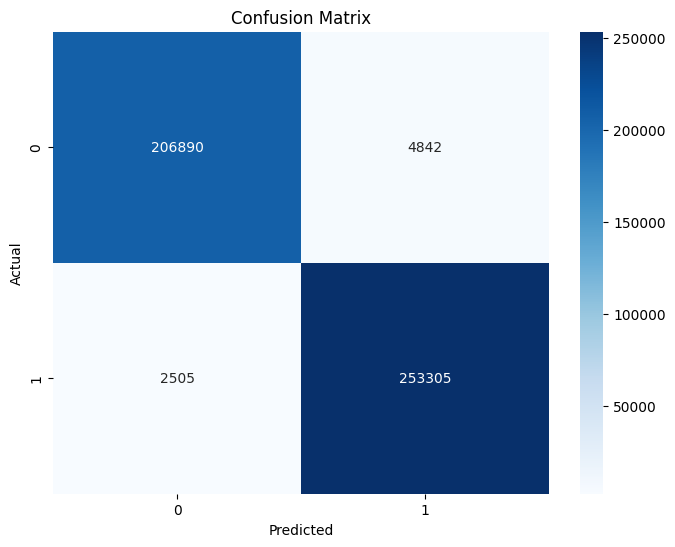

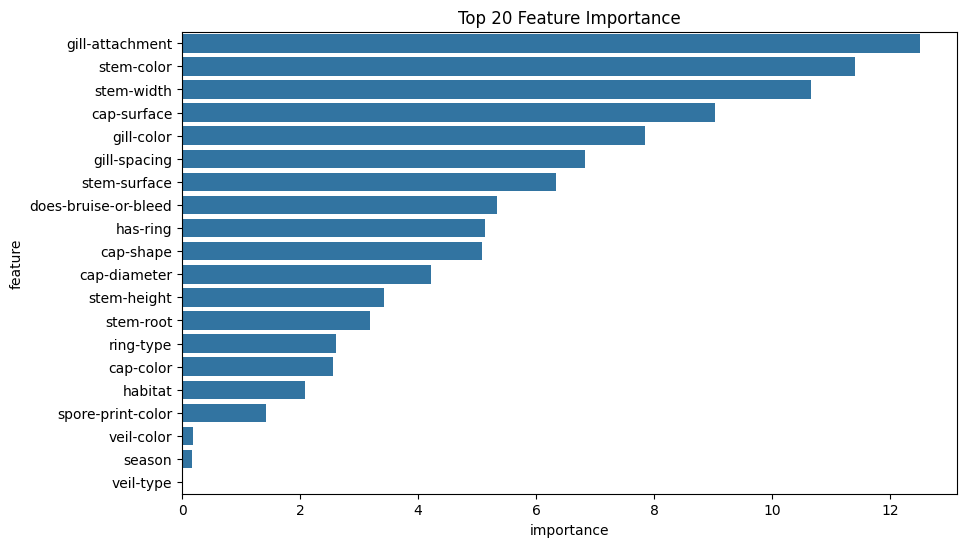

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot feature importance
feature_importance = catboost_classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importance')
plt.show()

## Test run

In [15]:
run_id = 'f1843ecc37c049359d50964e3ad0b890'
mlflow.artifacts.download_artifacts(run_id=run_id, dst_path='.')
train = pd.read_csv('train_processed.csv')
test = pd.read_csv('test_processed.csv')

'/content/'

In [17]:
run_id = '769cedfc8912448f995dfc9fed802e74'
mlflow.artifacts.download_artifacts(run_id=run_id, dst_path='.')
train = pd.read_csv('train_imputed.csv')
test = pd.read_csv('test_imputed.csv')

In [ ]:
run_id = '520e061c8a1a4dc89e8810713f3eb405'
mlflow.artifacts.download_artifacts(run_id=run_id, dst_path='.')
train = pd.read_csv('train_imputed.csv')
test = pd.read_csv('test_imputed.csv')

In [16]:
run_id = '078e945d66ed43898d65fc4437715516'
mlflow.artifacts.download_artifacts(run_id=run_id, dst_path='.')

'/content/'

In [18]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# Encoding the features
cat_cols_train = train.select_dtypes(include=['object']).columns
cat_cols_train = cat_cols_train[cat_cols_train != 'class']
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

train[cat_cols_train] = ordinal_encoder.fit_transform(train[cat_cols_train].astype(str))
test[cat_cols_train] = ordinal_encoder.transform(test[cat_cols_train].astype(str))

# Encoding the label
le = LabelEncoder()
train['class'] = le.fit_transform(train['class'])

In [ ]:
len(train)/1000000

3116945

In [19]:
# Prepare features and target
_train = train.sample(n=300000, random_state=257)
X = _train.drop(['class'], axis=1)  # Features
y = _train['class']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,
                                                    shuffle=True, stratify=y)
# mattews metrics for this competiton
from sklearn.metrics import matthews_corrcoef, accuracy_score, classification_report,confusion_matrix

def get_score(model):
    y_ = model.predict(X_train)
    y_pred = model.predict(X_test)
    return matthews_corrcoef(y_train, y_), matthews_corrcoef(y_test, y_pred)



In [2]:
def mcc_metric(y_pred, dmatrix):
    # y_true = dmatrix.get_label()
    y_true = dmatrix
    y_pred = (y_pred > 0.5).astype(int)
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc
def read_study(study):
    """
    returns dataframe after studying best trials of study

    parameters:
        - study (optuna.study) - optuna study object
    """
    res_ = {
        'trial_id'  : [],
        'test_score'  : [],
        'margin'    : [],
        'params'    : [],
    }
    for trial in study.best_trials:
        res_['trial_id'].append(trial.number)
        res_['params'].append(trial.params)
        res_['test_score'].append(trial.values[0])
        res_['margin'].append(trial.values[1])

    result_df = pd.DataFrame(res_)
    select_cols = ['trial_id', 'train_score', 'test_score', 'margin', 'params']
    result_df['train_score'] = result_df['test_score'] - result_df['margin']
    result_df = result_df[select_cols]
    return result_df
"""
result_df = read_study(study)
result_df.sort_values(['accuracy','margin'], ascending=[False, False]).reset_index(drop=True)
result_df.sort_values(['test_acc','margin'], ascending=[False, False]).reset_index(drop=True)
result_df.sort_values(['margin', 'test_acc',], ascending=[False, False]).reset_index(drop=True)
"""
def run_optuna(study_name, n_trials=100):
    storage = optuna.storages.RDBStorage(f"sqlite:///output/logs/{study_name}.db")
    study = optuna.create_study(directions= ['maximize', 'maximize' ],storage = storage, study_name = study_name, load_if_exists=True)
    study.optimize(objective, n_trials = n_trials)
    try:
        result_df = pd.read_csv(f"output/logs/{study_name}.csv")
        result_df = pd.concat([result_df, read_study(study)]).reset_index(drop=True)
    except FileNotFoundError:
        result_df = read_study(study)
    result_df.to_csv(f"output/logs/{study_name}.csv", index=False)

from optuna.pruners import PercentilePruner
from optuna.samplers import TPESampler
def run_optuna_(study_name, n_trials=100):
    storage = optuna.storages.RDBStorage(f"sqlite:///output/logs/{study_name}_1.db")
    pruner = PercentilePruner(60, n_startup_trials=10)
    sampler = TPESampler(n_startup_trials=10) # we are not using t currently
    study = optuna.create_study(direction= 'maximize',storage = storage, study_name = study_name, pruner=pruner,load_if_exists=True)
    study.optimize(objective, n_trials = n_trials)
    clear_output()
    return study.best_params
# Prepare submission
sub = pd.read_csv("sample_submission.csv")
def create_submission(model=None, test_pred=None):
    if test_pred is None:
        test_pred = model.predict(test)
    test_pred_labels = le.inverse_transform(test_pred)
    sub['class'] = test_pred_labels
    sub.to_csv('submission.csv', index=False)

experimental_study = {
    'name' : [],
    'train_score': [],
    'test_score': [],
    'score': [],
    'params': []
}

ModuleNotFoundError: No module named 'optuna'

## Dry runs

In [ ]:
target_feature = 'class'
def select_model(dataframe, test_size=.3, target_feature=target_feature, model = None):
    !mkdir -p output/data
    algos = [
            DecisionTreeClassifier(),
            # ExtraTreeClassifier(),
            AdaBoostClassifier(), BaggingClassifier(),
            # ExtraTreesClassifier(),
            RandomForestClassifier(),
            # GradientBoostingClassifier(),
            # HistGradientBoostingClassifier(),
            LGBMClassifier(), XGBClassifier(), XGBRFClassifier(),
            CatBoostClassifier(verbose=0)

            ]
    names = list(map(lambda x: x.__class__.__name__, algos))

    history = { 'algo_name': names,
                'train_score' : [],
                'test_score' : [],
                'train_metrics': [],
                'test_metrics': [],
                }
    for model in algos:
        print(f"{model.__class__.__name__} has started!")
        model.fit(X_train, y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)
        history['train_score'].append(accuracy_score(y_train, pred_train))
        history['test_score'].append(accuracy_score(y_test, pred_test))
        try:
            y_prob = model.predict(X_train)
            train_metrics, test_metrics = get_score(model)
            history['train_metrics'].append(train_metrics)
            history['test_metrics'].append(test_metrics)
        except Exception as e:
            history['train_metrics'].append(np.nan)
            history['test_metrics'].append(np.nan)
    return pd.DataFrame(history)

In [ ]:
select_model(train)

DecisionTreeClassifier has started!
ExtraTreeClassifier has started!


,algo_name,train_score,test_score,train_metrics,test_metrics
0,DecisionTreeClassifier,0.999995,0.981573,"(mcc, 0.9999898264891249)","(mcc, 0.9628123446206024)"
1,ExtraTreeClassifier,0.999995,0.982160,"(mcc, 0.9999898264891249)","(mcc, 0.9639992941270785)"


In [ ]:
x = select_model(train)
x['diff_metrics'] = x['train_metrics'] - x['test_metrics']
x.to_csv('output/data/model_selection.csv', index=False)
x

DecisionTreeClassifier has started!
AdaBoostClassifier has started!
BaggingClassifier has started!
RandomForestClassifier has started!
LGBMClassifier has started!
[LightGBM] [Info] Number of positive: 1193305, number of negative: 988556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.458862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 880
[LightGBM] [Info] Number of data points in the train set: 2181861, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546921 -> initscore=0.188237
[LightGBM] [Info] Start training from score 0.188237
XGBClassifier has started!
XGBRFClassifier has started!
CatBoostClassifier has started!


In [ ]:
x['diff_metrics'] = x['train_metrics'] - x['test_metrics']
x.to_csv('output/data/model_selection.csv', index=False)
x

,algo_name,train_score,test_score,train_metrics,test_metrics,diff_metrics
0,DecisionTreeClassifier,0.999996,0.981778,0.999993,0.963222,0.036771
1,AdaBoostClassifier,0.812133,0.812333,0.621071,0.621388,-0.000317
2,BaggingClassifier,0.998535,0.989602,0.997046,0.979027,0.018019
3,RandomForestClassifier,0.999981,0.991404,0.999962,0.982657,0.017305
4,LGBMClassifier,0.986925,0.986824,0.973642,0.973430,0.000213
5,XGBClassifier,0.990438,0.990178,0.980715,0.980188,0.000527
6,XGBRFClassifier,0.850430,0.849796,0.705918,0.704670,0.001249
7,CatBoostClassifier,0.990827,0.990535,0.981500,0.980905,0.000595


## Model selection and Result appender

In [ ]:
train = pd.read_csv('train_processed.csv')
test = pd.read_csv('test_processed.csv')
# mattews metrics for this competiton
def mcc_metric(y_pred, dmatrix):
    # y_true = dmatrix.get_label()
    y_true = dmatrix
    y_pred = (y_pred > 0.5).astype(int)
    mcc = matthews_corrcoef(y_true, y_pred)
    return mcc

array([1, 1, 1, ..., 0, 1, 0])

In [ ]:
def read_study(study):
    """
    returns dataframe after studying best trials of study

    parameters:
        - study (optuna.study) - optuna study object
    """
    res_ = {
        'trial_id'  : [],
        'test_score'  : [],
        'margin'    : [],
        'params'    : [],
    }
    for trial in study.best_trials:
        res_['trial_id'].append(trial.number)
        res_['params'].append(trial.params)
        res_['test_score'].append(trial.values[0])
        res_['margin'].append(trial.values[1])

    result_df = pd.DataFrame(res_)
    select_cols = ['trial_id', 'train_score', 'test_score', 'margin', 'params']
    result_df['train_score'] = result_df['test_score'] - result_df['margin']
    result_df = result_df[select_cols]
    return result_df

"""
result_df = read_study(study)
result_df.to_csv("LGBM_study.csv", index=False)
result_df.sort_values(['train_score','margin'], ascending=[False, False]).reset_index(drop=True)
result_df.sort_values(['test_score','margin'], ascending=[False, False]).reset_index(drop=True)
result_df.sort_values(['margin', 'test_score',], ascending=[False, False]).reset_index(drop=True)
"""
def run_optuna(study_name, n_trials=100):
    storage = optuna.storages.RDBStorage(f"sqlite:///output/logs/{study_name}.db")
    study = optuna.create_study(directions= ['maximize', 'maximize' ],storage = storage, study_name = study_name, load_if_exists=True)
    study.optimize(objective, n_trials = n_trials)
    try:
        result_df = pd.read_csv(f"output/logs/{study_name}.csv")
        result_df = pd.concat([result_df, read_study(study)]).reset_index(drop=True)
    except FileNotFoundError:
        result_df = read_study(study)
    result_df.to_csv(f"output/logs/{study_name}.csv", index=False)

experimental_study = {
    'name' : [],
    'train_score': [],
    'test_score': [],
    'score': [],
    'params': []
}

## LGBM Model

In [ ]:
lgbm = LGBMClassifier(verbose=-1)
lgbm.fit(X_train, y_train)

LGBMClassifier(verbose=-1)

In [ ]:
y_pred = lgbm.predict(X_test)

In [ ]:
get_score(lgbm)

(0.973234298593822, 0.9729363673576823)

In [ ]:
# optuna objective function for hyperparameter tuning of LGBM
def objective(trial):
    params = {
        'boosting_type'    : trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves'        : trial.suggest_int('num_leaves', 10, 100),
        'max_depth'         : trial.suggest_categorical('max_depth', [-1,3, 4, 5]),
        'learning_rate'     : trial.suggest_float('learning_rate', .001, 2, log=True),
        # 'n_estimators'      : trial.suggest_int('n_estimators', 100, 1000),


        'min_split_gain'    : trial.suggest_float('min_split_gain', 0, 1),
        'min_child_weight'  : trial.suggest_float('min_child_weight', 0, 1),
        'min_child_samples' : trial.suggest_int('min_child_samples', 20, 100),

        'subsample'         : trial.suggest_categorical('subsample', [.4, .5, .67, .75, .8, .9, .95, 1.0]),
        'colsample_bytree'  : trial.suggest_categorical('colsample_bytree', [.4, .5, .67, .75, .8, .9, .95, 1.0]),

        'reg_alpha'         : trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda'        : trial.suggest_float('reg_lambda', 0, 1),
        }

    model = LGBMClassifier(**params, verbose=-1,random_state=6547)
    model.fit(X_train, y_train)
    train_score, test_score = get_score(model)
    return test_score, test_score-train_score


In [ ]:
study_name = 'LGBM_study'
storage = optuna.storages.RDBStorage(f"sqlite:///output/logs/{study_name}.db")
study = optuna.create_study(directions= ['maximize', 'maximize' ],storage = storage, study_name = study_name, load_if_exists=True)
study.optimize(objective, n_trials = 200)

[I 2024-08-23 18:03:13,340] Using an existing study with name 'LGBM_study' instead of creating a new one.
[I 2024-08-23 18:03:31,618] Trial 2 finished with values: [0.7989415147574602, 0.0015565709007707706] and parameters: {'boosting_type': 'dart', 'num_leaves': 21, 'max_depth': 5, 'learning_rate': 0.04225360707303997, 'min_split_gain': 0.5706080169763332, 'min_child_weight': 0.5487935052997904, 'min_child_samples': 62, 'subsample': 0.75, 'colsample_bytree': 0.95, 'reg_alpha': 0.07139624131611955, 'reg_lambda': 0.5759516536695838}. 
[I 2024-08-23 18:03:40,498] Trial 3 finished with values: [0.45554468263384384, -0.00012359791970206757] and parameters: {'boosting_type': 'dart', 'num_leaves': 35, 'max_depth': 3, 'learning_rate': 0.009675458322411686, 'min_split_gain': 0.9791340593743089, 'min_child_weight': 0.7286947539447798, 'min_child_samples': 40, 'subsample': 0.5, 'colsample_bytree': 0.8, 'reg_alpha': 0.7144514725008698, 'reg_lambda': 0.8176045267961406}. 
[I 2024-08-23 18:03:53,04

In [ ]:
result_df = read_study(study)
result_df.to_csv(f"output/logs/{study_name}.csv", index=False)

In [ ]:
result_df.sort_values(['train_score','margin'], ascending=[False, False]).reset_index(drop=True)
result_df.sort_values(['test_score','margin'], ascending=[False, False]).reset_index(drop=True)
# result_df.sort_values(['margin', 'test_score',], ascending=[False, False]).reset_index(drop=True)

,trial_id,train_score,test_score,margin,params
0,60,0.987673,0.978813,-0.008861,"{'boosting_type': 'dart', 'num_leaves': 73, 'm..."
1,141,0.986177,0.978545,-0.007632,"{'boosting_type': 'dart', 'num_leaves': 56, 'm..."
2,174,0.984526,0.978053,-0.006473,"{'boosting_type': 'dart', 'num_leaves': 60, 'm..."
3,180,0.978262,0.976557,-0.001705,"{'boosting_type': 'gbdt', 'num_leaves': 62, 'm..."
4,97,0.977234,0.975886,-0.001349,"{'boosting_type': 'gbdt', 'num_leaves': 56, 'm..."
5,89,0.971658,0.970475,-0.001183,"{'boosting_type': 'gbdt', 'num_leaves': 35, 'm..."
6,195,0.971293,0.970380,-0.000913,"{'boosting_type': 'gbdt', 'num_leaves': 73, 'm..."
7,58,0.953487,0.952589,-0.000898,"{'boosting_type': 'dart', 'num_leaves': 73, 'm..."
8,111,0.949620,0.949051,-0.000568,"{'boosting_type': 'dart', 'num_leaves': 73, 'm..."
9,175,0.948097,0.947808,-0.000289,"{'boosting_type': 'gbdt', 'num_leaves': 75, 'm..."


In [ ]:
params = [
        {'boosting_type': 'dart', 'num_leaves': 69, 'max_depth': -1, 'learning_rate': 0.09761597071779314, 'min_split_gain': 0.757608825687582, 'min_child_weight': 0.5550654345368428, 'min_child_samples': 31, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.3081519740387344, 'reg_lambda': 0.8188197555988228}
    ,   {'boosting_type': 'gbdt', 'num_leaves': 56, 'max_depth': -1, 'learning_rate': 0.07417047201609692, 'min_split_gain': 0.8727296442235047, 'min_child_weight': 0.89434641713881, 'min_child_samples': 65, 'subsample': 0.95, 'colsample_bytree': 0.67, 'reg_alpha': 0.1267175996899772, 'reg_lambda': 0.3351902146655469}
    ,   {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': -1, 'learning_rate': 0.07417047201609692, 'min_split_gain': 0.42972972768063256, 'min_child_weight': 0.89434641713881, 'min_child_samples': 48, 'subsample': 0.9, 'colsample_bytree': 0.95, 'reg_alpha': 0.19738081044154476, 'reg_lambda': 0.8220066495006839}
    ,   {'boosting_type': 'gbdt', 'num_leaves': 73, 'max_depth': 3, 'learning_rate': 1.1660396173568217, 'min_split_gain': 0.8844693036082598, 'min_child_weight': 0.7901950013834719, 'min_child_samples': 34, 'subsample': 0.4, 'colsample_bytree': 0.5, 'reg_alpha': 0.8197941957941457, 'reg_lambda': 0.8963163210189937}
    ]
for i, p in enumerate(params):
    name = f'LGBM_{i}'
    model = LGBMClassifier(**p, verbose=-1,random_state=6547)
    model.fit(X_train,y_train)
    a, b = get_score(model)
    c = matthews_corrcoef(train['class'], model.predict(train.drop('class',axis=1)))
    experimental_study['name'].append(name)
    experimental_study['train_score'].append(a)
    experimental_study['test_score'].append(b)
    experimental_study['score'].append(c)
    experimental_study['params'].append(p)



In [ ]:
matthews_corrcoef(y_train, lgbm.predict(X_train))

0.9764787625989617

In [ ]:
matthews_corrcoef(y_test, lgbm.predict(X_test))

0.976001522023989

In [ ]:
matthews_corrcoef(train['class'], lgbm.predict(train.drop('class',axis=1)))

0.9764502037693138

## XGB Model

In [ ]:
def objective(trial):

    params = {
        'max_depth'         : trial.suggest_categorical('max_depth', [3, 4, 5, 6, None]),
        'max_leaves'        : trial.suggest_int('max_leaves', 0,100),
        'grow_policy'       : trial.suggest_categorical('grow_policy', ['depthwise','lossguide', None]),
        'learning_rate'     : trial.suggest_float('learning_rate', .001, 2, log=True),
        'tree_method'       : trial.suggest_categorical('tree_method', ['exact', 'approx', 'hist', None]),
        'gamma'             : trial.suggest_categorical('gamma',[0, 1e-4, 1e-3, 1e-1, None] ),
        'subsample'         : trial.suggest_categorical('subsample',[ .4, .5, .67, .75, .8, .9, 1.0] ),
        'colsample_bytree'  : trial.suggest_categorical('colsample_bytree',[ .4, .5, .67, .75, .8, .9, 1.0] ),
        'colsample_bylevel' : trial.suggest_categorical('colsample_bylevel',[ .4, .5, .67, .75, .8, .9, 1.0] ),
        'colsample_bynode'  : trial.suggest_categorical('colsample_bynode',[ .4, .5, .67, .75, .8, .9, 1.0] ),
        'reg_alpha'         : trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda'        : trial.suggest_float('reg_lambda', 0, 1),
        'importance_type'   : trial.suggest_categorical('importance_type', ['gain', 'weight', 'cover', 'total_gain', 'total_cover', None]),
    }

    model = XGBClassifier(**params)

    try:
        model.fit(X_train, y_train)
        train_score, test_score = get_score(model)
        return test_score, test_score-train_score
    except Exception as e:
        return -np.inf, -np.inf


In [ ]:
study_name = 'XGB_study'
run_optuna(study_name, n_trials=200)

[I 2024-08-23 18:50:04,066] Using an existing study with name 'XGB_study' instead of creating a new one.
[I 2024-08-23 18:50:14,257] Trial 2 finished with values: [0.9705998118911079, -0.0014521001921127263] and parameters: {'max_depth': None, 'max_leaves': 20, 'grow_policy': 'lossguide', 'learning_rate': 0.2891880819252363, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.67, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.75, 'reg_alpha': 0.6577162317820963, 'reg_lambda': 0.9085699180052262, 'importance_type': 'total_cover'}. 
[W 2024-08-23 18:50:14,698] Trial 3 failed with parameters: {'max_depth': 6, 'max_leaves': 20, 'grow_policy': 'depthwise', 'learning_rate': 0.011327958382945626, 'tree_method': 'exact', 'gamma': 0.0001, 'subsample': 1.0, 'colsample_bytree': 0.75, 'colsample_bylevel': 0.8, 'colsample_bynode': 0.8, 'reg_alpha': 0.8481945243511396, 'reg_lambda': 0.13551505461945534, 'importance_type': 'cover'} because of the following error: The number 

In [ ]:
result_df = pd.read_csv(f"output/logs/{study_name}.csv")
result_df.sort_values(['test_score','margin'], ascending=[False, False]).reset_index(drop=True)

,trial_id,train_score,test_score,margin,params
0,122,0.983364,0.977693,-0.005671,"{'max_depth': None, 'max_leaves': None, 'grow_policy': 'lossguide', 'learning_rate': 0.5544588533423066, 'tree_method': 'hist', 'gamma': 0, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.5, 'reg_alpha': 0.17147670613011, 'reg_lambda': 0.30215963978350624, 'importance_type': 'gain'}"
1,29,0.982203,0.977629,-0.004574,"{'max_depth': 6, 'max_leaves': 30, 'grow_policy': None, 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.75, 'colsample_bynode': 0.8, 'reg_alpha': 0.7904286503515592, 'reg_lambda': 0.006615935789370475, 'importance_type': None}"
2,155,0.982203,0.977629,-0.004574,"{'max_depth': 6, 'max_leaves': 30, 'grow_policy': None, 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.75, 'colsample_bynode': 0.8, 'reg_alpha': 0.7904286503515592, 'reg_lambda': 0.006615935789370475, 'importance_type': None}"
3,167,0.980661,0.977493,-0.003167,"{'max_depth': None, 'max_leaves': 25, 'grow_policy': 'depthwise', 'learning_rate': 0.5544588533423066, 'tree_method': 'approx', 'gamma': None, 'subsample': 0.9, 'colsample_bytree': 0.8, 'colsample_bylevel': 0.9, 'colsample_bynode': 0.5, 'reg_alpha': 0.4406764636381686, 'reg_lambda': 0.30215963978350624, 'importance_type': 'cover'}"
4,168,0.977697,0.975415,-0.002282,"{'max_depth': None, 'max_leaves': 20, 'grow_policy': 'lossguide', 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.67, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.75, 'reg_alpha': 0.6577162317820963, 'reg_lambda': 0.9085699180052262, 'importance_type': 'total_cover'}"
5,66,0.977466,0.975349,-0.002117,"{'max_depth': None, 'max_leaves': 20, 'grow_policy': 'lossguide', 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.75, 'reg_alpha': 0.7904286503515592, 'reg_lambda': 0.9085699180052262, 'importance_type': 'total_cover'}"
6,171,0.972394,0.971249,-0.001144,"{'max_depth': None, 'max_leaves': 20, 'grow_policy': 'lossguide', 'learning_rate': 0.2891880819252363, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.75, 'reg_alpha': 0.2768094307557236, 'reg_lambda': 0.9085699180052262, 'importance_type': 'total_cover'}"
7,38,0.839533,0.838490,-0.001043,"{'max_depth': 6, 'max_leaves': None, 'grow_policy': 'depthwise', 'learning_rate': 0.011580604779828634, 'tree_method': None, 'gamma': None, 'subsample': 1.0, 'colsample_bytree': 0.75, 'colsample_bylevel': 0.9, 'colsample_bynode': 0.8, 'reg_alpha': 0.22927035783251415, 'reg_lambda': 0.3103345694796579, 'importance_type': 'gain'}"
8,26,0.776781,0.778324,0.001543,"{'max_depth': None, 'max_leaves': 20, 'grow_policy': 'depthwise', 'learning_rate': 0.01324891277374223, 'tree_method': 'approx', 'gamma': None, 'subsample': 0.67, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.67, 'colsample_bynode': 0.9, 'reg_alpha': 0.9758484744044456, 'reg_lambda': 0.9453713160825233, 'importance_type': 'total_gain'}"
9,178,0.727798,0.730184,0.002386,"{'max_depth': 5, 'max_leaves': 27, 'grow_policy': 'lossguide', 'learning_rate': 0.01324891277374223, 'tree_method': 'approx', 'gamma': 0.0001, 'subsample': 0.67, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.4, 'colsample_bynode': 1.0, 'reg_alpha': 0.9758484744044456, 'reg_lambda': 0.36151359527265914, 'importance_type': 'gain'}"


In [ ]:
params = [
     {'max_depth': None, 'max_leaves': 20, 'grow_policy': 'lossguide', 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.67, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.75, 'reg_alpha': 0.6577162317820963, 'reg_lambda': 0.9085699180052262, 'importance_type': 'total_cover'}
    ,{'max_depth': None, 'max_leaves': 20, 'grow_policy': 'lossguide', 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.75, 'reg_alpha': 0.7904286503515592, 'reg_lambda': 0.9085699180052262, 'importance_type': 'total_cover'}
    ,{'max_depth': None, 'max_leaves': 20, 'grow_policy': 'lossguide', 'learning_rate': 0.2891880819252363, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.75, 'reg_alpha': 0.2768094307557236, 'reg_lambda': 0.9085699180052262, 'importance_type': 'total_cover'}
    ,{'max_depth': 6, 'max_leaves': 30, 'grow_policy': None, 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.75, 'colsample_bynode': 0.8, 'reg_alpha': 0.7904286503515592, 'reg_lambda': 0.006615935789370475, 'importance_type': None}
    ,
]

for i, p in enumerate(params):
    name = f'XGB_{i}'
    model = XGBClassifier(**p)
    model.fit(X_train,y_train)
    a, b = get_score(model)
    c = matthews_corrcoef(train['class'], model.predict(train.drop('class',axis=1)))
    experimental_study['name'].append(name)
    experimental_study['train_score'].append(a)
    experimental_study['test_score'].append(b)
    experimental_study['score'].append(c)
    experimental_study['params'].append(p)

## CatBoost Model

In [ ]:
cbc = CatBoostClassifier(verbose=50,random_state = 84987)
cbc.fit(X_train, y_train)

Learning rate set to 0.101047
0:	learn: 0.6468566	total: 134ms	remaining: 2m 13s
50:	learn: 0.1826594	total: 9.01s	remaining: 2m 47s
100:	learn: 0.0956675	total: 14.4s	remaining: 2m 7s
150:	learn: 0.0672146	total: 17.1s	remaining: 1m 36s
200:	learn: 0.0554373	total: 20.8s	remaining: 1m 22s
250:	learn: 0.0502046	total: 26.9s	remaining: 1m 20s
300:	learn: 0.0470645	total: 30.5s	remaining: 1m 10s
350:	learn: 0.0450514	total: 33.1s	remaining: 1m 1s
400:	learn: 0.0435407	total: 37.5s	remaining: 56s
450:	learn: 0.0421096	total: 46.8s	remaining: 57s
500:	learn: 0.0414850	total: 53.4s	remaining: 53.2s
550:	learn: 0.0406231	total: 58.4s	remaining: 47.6s
600:	learn: 0.0402892	total: 1m 5s	remaining: 43.2s
650:	learn: 0.0399360	total: 1m 10s	remaining: 37.7s
700:	learn: 0.0397278	total: 1m 12s	remaining: 30.9s
750:	learn: 0.0397272	total: 1m 14s	remaining: 24.8s
800:	learn: 0.0394602	total: 1m 17s	remaining: 19.2s
850:	learn: 0.0390839	total: 1m 20s	remaining: 14.1s
900:	learn: 0.0386877	total: 1

In [ ]:
get_score(cbc)

(0.9825491672269097, 0.9787916332335066)

In [ ]:
matthews_corrcoef(train['class'], cbc.predict(train.drop('class',axis=1)))

0.9797752017824367

In [ ]:
def objective(trial):
    params = {
        'learning_rate'                 : trial.suggest_float('learning_rate', .001, 2, log=True),
        'objective'                     : trial.suggest_categorical('objective', ['Logloss', 'CrossEntropy']),
        'depth'                         : trial.suggest_int('depth', 3, 10),
        'reg_lambda'                    : trial.suggest_float('reg_lambda', 0, 10),
        'subsample'                     : trial.suggest_float('subsample', 0, 1),
        'colsample_bylevel'             : trial.suggest_float('colsample_bylevel', 0, 1),
        'min_child_samples'             : trial.suggest_int('min_child_samples', 10, 100),
        'leaf_estimation_iterations'    : trial.suggest_int('leaf_estimation_iterations', 5, 20),


    }

    model = CatBoostClassifier(**params,iterations=100,verbose=0,random_state = 84987)

    try:
        model.fit(X_train, y_train)
        train_score, test_score = get_score(model)
        return test_score, test_score-train_score
    except Exception as e:
        return -np.inf, -np.inf

In [ ]:
study_name = 'CatBoost_study'
run_optuna(study_name, n_trials=250)

[I 2024-08-23 20:55:06,764] Using an existing study with name 'CatBoost_study' instead of creating a new one.
[I 2024-08-23 20:55:17,662] Trial 5 finished with values: [0.6417701853686137, -0.0016146974264628078] and parameters: {'learning_rate': 0.006518929417670547, 'objective': 'CrossEntropy', 'depth': 5, 'reg_lambda': 2.709990885025362, 'subsample': 0.0060614843982677025, 'colsample_bylevel': 0.21332344646155554, 'min_child_samples': 38, 'leaf_estimation_iterations': 18}. 
[I 2024-08-23 20:55:41,452] Trial 6 finished with values: [0.8874946770900741, -0.0005970356922023745] and parameters: {'learning_rate': 0.003419929023992414, 'objective': 'Logloss', 'depth': 10, 'reg_lambda': 3.190261091676976, 'subsample': 0.6137001785117389, 'colsample_bylevel': 0.8789724350399405, 'min_child_samples': 32, 'leaf_estimation_iterations': 14}. 
learning rate is greater than 1. You probably need to decrease learning rate.
learning rate is greater than 1. You probably need to decrease learning rate

In [ ]:
params = [
    {'learning_rate': 0.19068478145864712, 'objective': 'Logloss', 'depth': 9, 'reg_lambda': 1.3927531091623635, 'subsample': 0.6651469314640843, 'colsample_bylevel': 0.9706601048429702, 'min_child_samples': 50, 'leaf_estimation_iterations': 12},
    {'learning_rate': 0.174982304220691, 'objective': 'Logloss', 'depth': 8, 'reg_lambda': 7.512299289102047, 'subsample': 0.4877580683039361, 'colsample_bylevel': 0.6151802353705157, 'min_child_samples': 70, 'leaf_estimation_iterations': 12},
    {'learning_rate': 0.19068478145864712, 'objective': 'Logloss', 'depth': 7, 'reg_lambda': 8.947085765030208, 'subsample': 0.3934334059883876, 'colsample_bylevel': 0.8078464837389985, 'min_child_samples': 94, 'leaf_estimation_iterations': 8},
    {'learning_rate': 0.05895050294121335, 'objective': 'Logloss', 'depth': 10, 'reg_lambda': 9.058283844063986, 'subsample': 0.08931663638769871, 'colsample_bylevel': 0.9694763077811444, 'min_child_samples': 26, 'leaf_estimation_iterations': 12},
    {'learning_rate': 0.06614189893121368, 'objective': 'Logloss', 'depth': 6, 'reg_lambda': 9.042807154267283, 'subsample': 0.5314518336396845, 'colsample_bylevel': 0.6119706476986938, 'min_child_samples': 22, 'leaf_estimation_iterations': 6}
]

for i, p in enumerate(params):
    name = f'CatBoost_{i}'
    model = CatBoostClassifier(**p,iterations=100,verbose=0,random_state = 84987)
    model.fit(X_train,y_train)
    a, b = get_score(model)
    c = matthews_corrcoef(train['class'], model.predict(train.drop('class',axis=1)))
    experimental_study['name'].append(name)
    experimental_study['train_score'].append(a)
    experimental_study['test_score'].append(b)
    experimental_study['score'].append(c)
    experimental_study['params'].append(p)

## DecisionTree Model

In [ ]:
dt = DecisionTreeClassifier(max_depth=15, random_state = 84987)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=84987)

In [ ]:
get_score(dt)

(0.9790703092681022, 0.9626186238040242)

In [ ]:
matthews_corrcoef(train['class'], dt.predict(train.drop('class',axis=1)))

0.9641004557158417

In [ ]:
def objective(trial):
    params = {
        'criterion'         : trial.suggest_categorical('criterion', ['gini', 'entropy','log_loss']),
        'splitter'          : trial.suggest_categorical('splitter', ['best', 'random']),
        # 'max_depth'         : trial.suggest_int('max_depth', 10, 20),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 100),
        'min_samples_leaf'  : trial.suggest_int('min_samples_leaf', 1, 100),
        'max_features'      : trial.suggest_float('max_features', 0, 1),

    }

    model = DecisionTreeClassifier(**params, random_state = 84987)

    try:
        model.fit(X_train, y_train)
        train_score, test_score = get_score(model)
        return test_score, test_score-train_score
    except Exception as e:
        return -np.inf, -np.inf

In [ ]:
study_name = 'DecisionTree_study_2'
run_optuna(study_name, n_trials=200)

[I 2024-08-23 22:02:11,015] A new study created in RDB with name: DecisionTree_study_2
[I 2024-08-23 22:02:12,695] Trial 0 finished with values: [0.9221214882917187, -0.0019677017543513475] and parameters: {'criterion': 'entropy', 'splitter': 'random', 'min_samples_split': 98, 'min_samples_leaf': 72, 'max_features': 0.436351641885406}. 
[I 2024-08-23 22:02:13,471] Trial 1 finished with values: [0.7404753708876313, -0.0024946794838341946] and parameters: {'criterion': 'entropy', 'splitter': 'best', 'min_samples_split': 94, 'min_samples_leaf': 79, 'max_features': 0.006507353475893374}. 
[I 2024-08-23 22:02:14,718] Trial 2 finished with values: [0.9084898382189335, -0.0023729782583945536] and parameters: {'criterion': 'gini', 'splitter': 'best', 'min_samples_split': 49, 'min_samples_leaf': 98, 'max_features': 0.24168920300345387}. 
[I 2024-08-23 22:02:15,227] Trial 3 finished with values: [0.6367541290248621, -0.003221187292282157] and parameters: {'criterion': 'entropy', 'splitter': 'ran

In [ ]:
params = [
    {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 20, 'min_samples_split': 62, 'min_samples_leaf': 4, 'max_features': 'log2'}
,   {'criterion': 'gini', 'splitter': 'best', 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 62, 'max_features': 'log2'}
,   {'criterion': 'gini', 'splitter': 'best', 'max_depth': 18, 'min_samples_split': 42, 'min_samples_leaf': 13, 'max_features': 'sqrt'}
# Much better for next ones
,   {'criterion': 'gini', 'splitter': 'best', 'min_samples_split': 89, 'min_samples_leaf': 11, 'max_features': 0.9291342428121633}
,   {'criterion': 'gini', 'splitter': 'best', 'min_samples_split': 74, 'min_samples_leaf': 36, 'max_features': 0.9928178912156461}
,   {'criterion': 'entropy', 'splitter': 'random', 'min_samples_split': 70, 'min_samples_leaf': 33, 'max_features': 0.8674089707419785}
,
]

for i, p in enumerate(params):
    name = f'DecisionTree_{i}'
    model = DecisionTreeClassifier(**p, random_state = 84987)
    model.fit(X_train,y_train)
    a, b = get_score(model)
    c = matthews_corrcoef(train['class'], model.predict(train.drop('class',axis=1)))
    experimental_study['name'].append(name)
    experimental_study['train_score'].append(a)
    experimental_study['test_score'].append(b)
    experimental_study['score'].append(c)
    experimental_study['params'].append(p)

## RandomForest

In [ ]:
rf = RandomForestClassifier(n_estimators = 50, random_state = 84987)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=84987)

In [ ]:
get_score(rf)

(0.999788743786213, 0.9794828192976714)

In [ ]:
matthews_corrcoef(train['class'], rf.predict(train.drop('class',axis=1)))

0.9817006887449524

In [ ]:
rf = RandomForestClassifier(n_estimators = 25, random_state = 84987)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=84987)

In [ ]:
get_score(rf)

(0.9992702262482679, 0.9792597952486487)

In [ ]:
print(0.999788743786213- 0.9794828192976714)
print(0.9990973068294013- 0.979100575376417)
print(0.9975426110210399- 0.9768529359892669)
print(0.9986843814636275- 0.9780689762968701)
(0.9992702262482679- 0.9792597952486487)

0.020305924488541516
0.019996731452984307
0.02068967503177299
0.020615405166757417


0.02001043099961919

In [ ]:
def objective(trial):
    params = {
        'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy','log_loss']),
        'max_depth' : trial.suggest_int('max_depth', 3, 10),
        'min_samples_split' : trial.suggest_int('min_samples_split', 2, 100),
        'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 1, 100),
        'max_features' : trial.suggest_float('max_features', 0, 1),
    }

    model = RandomForestClassifier(**params, n_estimators = 25, random_state = 84987)

    try:
        model.fit(X_train, y_train)
        train_score, test_score = get_score(model)
        return test_score, test_score-train_score
    except Exception as e:
        return -np.inf, -np.inf

In [ ]:
study_name = 'RandomForest_study'
run_optuna(study_name, n_trials=200)

[I 2024-08-23 22:25:43,537] Using an existing study with name 'RandomForest_study' instead of creating a new one.
[I 2024-08-23 22:25:47,266] Trial 4 finished with values: [0.7246341785305608, 0.001705582042906717] and parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 69, 'min_samples_leaf': 89, 'max_features': 0.028495567209013806}. 
[I 2024-08-23 22:25:49,799] Trial 5 finished with values: [0.6817744225550193, -0.0017124163669439696] and parameters: {'criterion': 'log_loss', 'max_depth': 6, 'min_samples_split': 66, 'min_samples_leaf': 51, 'max_features': 0.011403872111754754}. 
[I 2024-08-23 22:25:59,235] Trial 6 finished with values: [0.8818264701830184, -0.002572269715734654] and parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 97, 'min_samples_leaf': 50, 'max_features': 0.23247042738204904}. 
[I 2024-08-23 22:26:01,574] Trial 7 finished with values: [0.5870333054185276, 0.0016304888153804153] and parameters: {'criterion': 'entropy', 'm

In [ ]:
params = [
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 80, 'min_samples_leaf': 54, 'max_features': 0.6978621069215338},
    {'criterion': 'gini', 'min_samples_split': 80, 'min_samples_leaf': 54, 'max_features': 0.6978621069215338},
    {'criterion': 'gini', 'min_samples_leaf': 54, 'max_features': 0.6978621069215338},
    {'criterion': 'gini', 'max_features': 0.6978621069215338},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 97, 'min_samples_leaf': 31, 'max_features': 0.6329734081761589},
    {'criterion': 'gini', 'min_samples_split': 97, 'min_samples_leaf': 31, 'max_features': 0.6329734081761589},
    {'criterion': 'gini', 'min_samples_leaf': 31, 'max_features': 0.6329734081761589},
    {'criterion': 'gini', 'max_features': 0.6329734081761589},
]

for i, p in enumerate(params):
    name = f'RandomForest_{i}'
    model = RandomForestClassifier(**p, n_estimators = 25, random_state = 84987)
    model.fit(X_train,y_train)
    a, b = get_score(model)
    c = matthews_corrcoef(train['class'], model.predict(train.drop('class',axis=1)))
    experimental_study['name'].append(name)
    experimental_study['train_score'].append(a)
    experimental_study['test_score'].append(b)
    experimental_study['score'].append(c)
    experimental_study['params'].append(p)

## Bagging

In [ ]:
def objective(trial):
    params = {
        'n_estimators'          : trial.suggest_int('n_estimators', 10, 100),
        'max_samples'           : trial.suggest_float('max_samples', 0, 1),
        'max_features'          : trial.suggest_float('max_features', 0, 1),
        'bootstrap'             : trial.suggest_categorical('bootstrap', [True, False]),
        'bootstrap_features'    : trial.suggest_categorical('bootstrap_features', [True, False]),
        'oob_score'             : trial.suggest_categorical('oob_score', [True, False]),
        'warm_start'            : trial.suggest_categorical('warm_start', [True, False]),
    }

    model = BaggingClassifier(**params, random_state = 84987)

    try:
        model.fit(X_train, y_train)
        train_score, test_score = get_score(model)
        return test_score, test_score-train_score
    except Exception as e:
        return -np.inf, -np.inf

In [ ]:
study_name = 'Bagging_study'
run_optuna(study_name, n_trials=10)

[I 2024-08-23 23:36:36,554] Using an existing study with name 'Bagging_study' instead of creating a new one.
[I 2024-08-23 23:36:36,827] Trial 10 finished with values: [-inf, -inf] and parameters: {'n_estimators': 44, 'max_samples': 0.9936185761851326, 'max_features': 0.13142890404465257, 'bootstrap': False, 'bootstrap_features': False, 'oob_score': True, 'warm_start': True}. 
[I 2024-08-23 23:36:43,704] Trial 11 finished with values: [0.35373703458162103, -0.02774550633779671] and parameters: {'n_estimators': 81, 'max_samples': 0.27325490752019366, 'max_features': 0.09577396750030198, 'bootstrap': False, 'bootstrap_features': False, 'oob_score': False, 'warm_start': True}. 
[I 2024-08-23 23:36:43,937] Trial 12 finished with values: [-inf, -inf] and parameters: {'n_estimators': 32, 'max_samples': 0.3142883983777881, 'max_features': 0.19307601148847342, 'bootstrap': True, 'bootstrap_features': True, 'oob_score': True, 'warm_start': True}. 
[I 2024-08-23 23:37:13,848] Trial 13 finished w

In [ ]:
params = [
    {'n_estimators': 93, 'max_samples': 0.21733042396748914, 'max_features': 0.5953281337800722, 'bootstrap': False, 'bootstrap_features': False, 'oob_score': False, 'warm_start': True},
    {'n_estimators': 100, 'max_samples': 0.03172955578542547, 'max_features': 0.9906681227297124, 'bootstrap': False, 'bootstrap_features': False, 'oob_score': False, 'warm_start': False},
    {'n_estimators': 74, 'max_samples': 0.14405199108306632, 'max_features': 0.6148078469642188, 'bootstrap': True, 'bootstrap_features': True, 'oob_score': True, 'warm_start': False},

]

for i, p in enumerate(params):
    name = f'Bagging_{i}'
    model = BaggingClassifier(**p, random_state = 84987)
    model.fit(X_train,y_train)
    a, b = get_score(model)
    c = matthews_corrcoef(train['class'], model.predict(train.drop('class',axis=1)))
    experimental_study['name'].append(name)
    experimental_study['train_score'].append(a)
    experimental_study['test_score'].append(b)
    experimental_study['score'].append(c)
    experimental_study['params'].append(p)

## Plotting and result viewer

### 1. Study of Models

In [ ]:
study_name = 'LGBM_study'

In [ ]:
result_df = pd.read_csv(f"output/logs/{study_name}.csv")
result_df.sort_values(['test_score','margin'], ascending=[False, False]).reset_index(drop=True)

,trial_id,train_score,test_score,margin,params
0,60,0.987673,0.978813,-0.008861,"{'boosting_type': 'dart', 'num_leaves': 73, 'max_depth': -1, 'learning_rate': 0.9039804880922787, 'min_split_gain': 0.17259168615093112, 'min_child_weight': 0.33696746943339195, 'min_child_samples': 67, 'subsample': 0.9, 'colsample_bytree': 0.75, 'reg_alpha': 0.027185500542413865, 'reg_lambda': 0.5360592030406514}"
1,141,0.986177,0.978545,-0.007632,"{'boosting_type': 'dart', 'num_leaves': 56, 'max_depth': -1, 'learning_rate': 0.9039804880922787, 'min_split_gain': 0.17259168615093112, 'min_child_weight': 0.89434641713881, 'min_child_samples': 67, 'subsample': 0.75, 'colsample_bytree': 0.75, 'reg_alpha': 0.13149735662943363, 'reg_lambda': 0.5360592030406514}"
2,174,0.984526,0.978053,-0.006473,"{'boosting_type': 'dart', 'num_leaves': 60, 'max_depth': -1, 'learning_rate': 0.9039804880922787, 'min_split_gain': 0.6482688103559207, 'min_child_weight': 0.2946416467972591, 'min_child_samples': 67, 'subsample': 0.9, 'colsample_bytree': 0.9, 'reg_alpha': 0.027185500542413865, 'reg_lambda': 0.5360592030406514}"
3,180,0.978262,0.976557,-0.001705,"{'boosting_type': 'gbdt', 'num_leaves': 62, 'max_depth': -1, 'learning_rate': 0.07417047201609692, 'min_split_gain': 0.5260865911476565, 'min_child_weight': 0.586576359540463, 'min_child_samples': 65, 'subsample': 0.95, 'colsample_bytree': 0.67, 'reg_alpha': 0.1267175996899772, 'reg_lambda': 0.3351902146655469}"
4,97,0.977234,0.975886,-0.001349,"{'boosting_type': 'gbdt', 'num_leaves': 56, 'max_depth': -1, 'learning_rate': 0.07417047201609692, 'min_split_gain': 0.8727296442235047, 'min_child_weight': 0.89434641713881, 'min_child_samples': 65, 'subsample': 0.95, 'colsample_bytree': 0.67, 'reg_alpha': 0.1267175996899772, 'reg_lambda': 0.3351902146655469}"
5,89,0.971658,0.970475,-0.001183,"{'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': -1, 'learning_rate': 0.07417047201609692, 'min_split_gain': 0.42972972768063256, 'min_child_weight': 0.89434641713881, 'min_child_samples': 48, 'subsample': 0.9, 'colsample_bytree': 0.95, 'reg_alpha': 0.19738081044154476, 'reg_lambda': 0.8220066495006839}"
6,195,0.971293,0.970380,-0.000913,"{'boosting_type': 'gbdt', 'num_leaves': 73, 'max_depth': 3, 'learning_rate': 1.1660396173568217, 'min_split_gain': 0.8844693036082598, 'min_child_weight': 0.7901950013834719, 'min_child_samples': 34, 'subsample': 0.4, 'colsample_bytree': 0.5, 'reg_alpha': 0.8197941957941457, 'reg_lambda': 0.8963163210189937}"
7,58,0.953487,0.952589,-0.000898,"{'boosting_type': 'dart', 'num_leaves': 73, 'max_depth': -1, 'learning_rate': 0.006151577724586664, 'min_split_gain': 0.17259168615093112, 'min_child_weight': 0.33696746943339195, 'min_child_samples': 67, 'subsample': 0.9, 'colsample_bytree': 0.4, 'reg_alpha': 0.687099824809322, 'reg_lambda': 0.9041070560172063}"
8,111,0.949620,0.949051,-0.000568,"{'boosting_type': 'dart', 'num_leaves': 73, 'max_depth': -1, 'learning_rate': 0.025392303981315423, 'min_split_gain': 0.1691233579695438, 'min_child_weight': 0.89434641713881, 'min_child_samples': 36, 'subsample': 0.9, 'colsample_bytree': 0.95, 'reg_alpha': 0.19738081044154476, 'reg_lambda': 0.8220066495006839}"
9,175,0.948097,0.947808,-0.000289,"{'boosting_type': 'gbdt', 'num_leaves': 75, 'max_depth': -1, 'learning_rate': 0.010662758086635459, 'min_split_gain': 0.4913249000413791, 'min_child_weight': 0.586576359540463, 'min_child_samples': 72, 'subsample': 0.95, 'colsample_bytree': 1.0, 'reg_alpha': 0.6419971395109656, 'reg_lambda': 0.44391425680865915}"


In [ ]:
result_df.sort_values(['train_score','margin'], ascending=[False, False]).reset_index(drop=True)

In [ ]:
result_df.sort_values(['margin', 'test_score',], ascending=[False, False]).reset_index(drop=True)

### 2. Final selection of model

In [ ]:
final_study = pd.DataFrame(experimental_study)
final_study.head(2)

,name,train_score,test_score,score,params
0,LGBM_0,0.975218,0.974282,0.974713,"{'boosting_type': 'dart', 'num_leaves': 69, 'max_depth': -1, 'learning_rate': 0.09761597071779314, 'min_split_gain': 0.757608825687582, 'min_child_weight': 0.5550654345368428, 'min_child_samples': 31, 'subsample': 0.5, 'colsample_bytree': 0.5, 'reg_alpha': 0.3081519740387344, 'reg_lambda': 0.8188197555988228}"
1,LGBM_1,0.977234,0.975886,0.976591,"{'boosting_type': 'gbdt', 'num_leaves': 56, 'max_depth': -1, 'learning_rate': 0.07417047201609692, 'min_split_gain': 0.8727296442235047, 'min_child_weight': 0.89434641713881, 'min_child_samples': 65, 'subsample': 0.95, 'colsample_bytree': 0.67, 'reg_alpha': 0.1267175996899772, 'reg_lambda': 0.3351902146655469}"


In [ ]:
final_study['margin'] = final_study['test_score']-final_study['train_score']
select_cols = ['name', 'train_score', 'test_score', 'score', 'margin', 'params']
final_study = final_study[select_cols]
final_study = final_study.sort_values(['score','margin'], ascending=[False, False]).reset_index(drop=True)
final_study

,name,train_score,test_score,score,margin,params
0,Bagging_0,0.986483,0.980713,0.981755,-0.005769,"{'n_estimators': 93, 'max_samples': 0.21733042396748914, 'max_features': 0.5953281337800722, 'bootstrap': False, 'bootstrap_features': False, 'oob_score': False, 'warm_start': True}"
1,Bagging_2,0.984573,0.979936,0.981091,-0.004637,"{'n_estimators': 74, 'max_samples': 0.14405199108306632, 'max_features': 0.6148078469642188, 'bootstrap': True, 'bootstrap_features': True, 'oob_score': True, 'warm_start': False}"
2,RandomForest_7,0.999040,0.977552,0.979852,-0.021488,"{'criterion': 'gini', 'max_features': 0.6329734081761589}"
3,RandomForest_3,0.999011,0.977396,0.979668,-0.021615,"{'criterion': 'gini', 'max_features': 0.6978621069215338}"
4,CatBoost_0,0.981878,0.977736,0.978665,-0.004141,"{'learning_rate': 0.19068478145864712, 'objective': 'Logloss', 'depth': 9, 'reg_lambda': 1.3927531091623635, 'subsample': 0.6651469314640843, 'colsample_bylevel': 0.9706601048429702, 'min_child_samples': 50, 'leaf_estimation_iterations': 12}"
5,XGB_3,0.982203,0.977629,0.978536,-0.004574,"{'max_depth': 6, 'max_leaves': 30, 'grow_policy': None, 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.75, 'colsample_bynode': 0.8, 'reg_alpha': 0.7904286503515592, 'reg_lambda': 0.006615935789370475, 'importance_type': None}"
6,CatBoost_1,0.979084,0.976978,0.977587,-0.002106,"{'learning_rate': 0.174982304220691, 'objective': 'Logloss', 'depth': 8, 'reg_lambda': 7.512299289102047, 'subsample': 0.4877580683039361, 'colsample_bylevel': 0.6151802353705157, 'min_child_samples': 70, 'leaf_estimation_iterations': 12}"
7,LGBM_1,0.977234,0.975886,0.976591,-0.001349,"{'boosting_type': 'gbdt', 'num_leaves': 56, 'max_depth': -1, 'learning_rate': 0.07417047201609692, 'min_split_gain': 0.8727296442235047, 'min_child_weight': 0.89434641713881, 'min_child_samples': 65, 'subsample': 0.95, 'colsample_bytree': 0.67, 'reg_alpha': 0.1267175996899772, 'reg_lambda': 0.3351902146655469}"
8,CatBoost_2,0.977493,0.975902,0.976587,-0.001591,"{'learning_rate': 0.19068478145864712, 'objective': 'Logloss', 'depth': 7, 'reg_lambda': 8.947085765030208, 'subsample': 0.3934334059883876, 'colsample_bylevel': 0.8078464837389985, 'min_child_samples': 94, 'leaf_estimation_iterations': 8}"
9,XGB_0,0.977697,0.975415,0.976319,-0.002282,"{'max_depth': None, 'max_leaves': 20, 'grow_policy': 'lossguide', 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.67, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.75, 'reg_alpha': 0.6577162317820963, 'reg_lambda': 0.9085699180052262, 'importance_type': 'total_cover'}"


In [ ]:
final_study.to_csv(f"output/logs/models_final.csv", index=False)

In [26]:
final_study = pd.read_csv(f"output/logs/models_final.csv")
final_study

,name,train_score,test_score,score,margin,params
0,Bagging_0,0.986483,0.980713,0.981755,-0.005769,"{'n_estimators': 93, 'max_samples': 0.21733042396748914, 'max_features': 0.5953281337800722, 'bootstrap': False, 'bootstrap_features': False, 'oob_score': False, 'warm_start': True}"
1,Bagging_2,0.984573,0.979936,0.981091,-0.004637,"{'n_estimators': 74, 'max_samples': 0.14405199108306632, 'max_features': 0.6148078469642188, 'bootstrap': True, 'bootstrap_features': True, 'oob_score': True, 'warm_start': False}"
2,RandomForest_7,0.999040,0.977552,0.979852,-0.021488,"{'criterion': 'gini', 'max_features': 0.6329734081761589}"
3,RandomForest_3,0.999011,0.977396,0.979668,-0.021615,"{'criterion': 'gini', 'max_features': 0.6978621069215338}"
4,CatBoost_0,0.981878,0.977736,0.978665,-0.004141,"{'learning_rate': 0.19068478145864712, 'objective': 'Logloss', 'depth': 9, 'reg_lambda': 1.3927531091623635, 'subsample': 0.6651469314640843, 'colsample_bylevel': 0.9706601048429702, 'min_child_samples': 50, 'leaf_estimation_iterations': 12}"
5,XGB_3,0.982203,0.977629,0.978536,-0.004574,"{'max_depth': 6, 'max_leaves': 30, 'grow_policy': None, 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.9, 'colsample_bytree': 1.0, 'colsample_bylevel': 0.75, 'colsample_bynode': 0.8, 'reg_alpha': 0.7904286503515592, 'reg_lambda': 0.006615935789370475, 'importance_type': None}"
6,CatBoost_1,0.979084,0.976978,0.977587,-0.002106,"{'learning_rate': 0.174982304220691, 'objective': 'Logloss', 'depth': 8, 'reg_lambda': 7.512299289102047, 'subsample': 0.4877580683039361, 'colsample_bylevel': 0.6151802353705157, 'min_child_samples': 70, 'leaf_estimation_iterations': 12}"
7,LGBM_1,0.977234,0.975886,0.976591,-0.001349,"{'boosting_type': 'gbdt', 'num_leaves': 56, 'max_depth': -1, 'learning_rate': 0.07417047201609692, 'min_split_gain': 0.8727296442235047, 'min_child_weight': 0.89434641713881, 'min_child_samples': 65, 'subsample': 0.95, 'colsample_bytree': 0.67, 'reg_alpha': 0.1267175996899772, 'reg_lambda': 0.3351902146655469}"
8,CatBoost_2,0.977493,0.975902,0.976587,-0.001591,"{'learning_rate': 0.19068478145864712, 'objective': 'Logloss', 'depth': 7, 'reg_lambda': 8.947085765030208, 'subsample': 0.3934334059883876, 'colsample_bylevel': 0.8078464837389985, 'min_child_samples': 94, 'leaf_estimation_iterations': 8}"
9,XGB_0,0.977697,0.975415,0.976319,-0.002282,"{'max_depth': None, 'max_leaves': 20, 'grow_policy': 'lossguide', 'learning_rate': 0.5242734204817764, 'tree_method': 'hist', 'gamma': 0.1, 'subsample': 0.67, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.5, 'colsample_bynode': 0.75, 'reg_alpha': 0.6577162317820963, 'reg_lambda': 0.9085699180052262, 'importance_type': 'total_cover'}"


### 3. Syncing S3 buckets

In [ ]:
repo = "SantanuK/Kaggle-Competitions-Lab"
dagshub.storage.mount(repo)

Do you want to install all missing packages?
Are you sure [y/(N)]: y


Installing rclone...

rclone installed successfully.

Installing fusermount3...

fusermount3 installed successfully.

Successfully mounted DagsHub Storage in 'Kaggle-Competitions-Lab' to 'Kaggle-Competitions-Lab/dagshub_storage'.

To unmount, run `dagshub.storage.unmount(repo="SantanuK/Kaggle-Competitions-Lab", 
path="Kaggle-Competitions-Lab/dagshub_storage")`.

PosixPath('Kaggle-Competitions-Lab/dagshub_storage')

In [ ]:
# dagshub.storage.sync(repo)
# dagshub.storage.unmount(repo,path="Kaggle-Competitions-Lab/dagshub_storage")

In [ ]:
# Print accuracy and classification report
print(f"\nMathews Cor Coef: {mcc_metric(y_test, y_pred)}")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Mathews Cor Coef: ('mcc', 0.9729363673576823)

Accuracy: 0.9865733987534809

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    423465
           1       0.99      0.99      0.99    511619

    accuracy                           0.99    935084
   macro avg       0.99      0.99      0.99    935084
weighted avg       0.99      0.99      0.99    935084



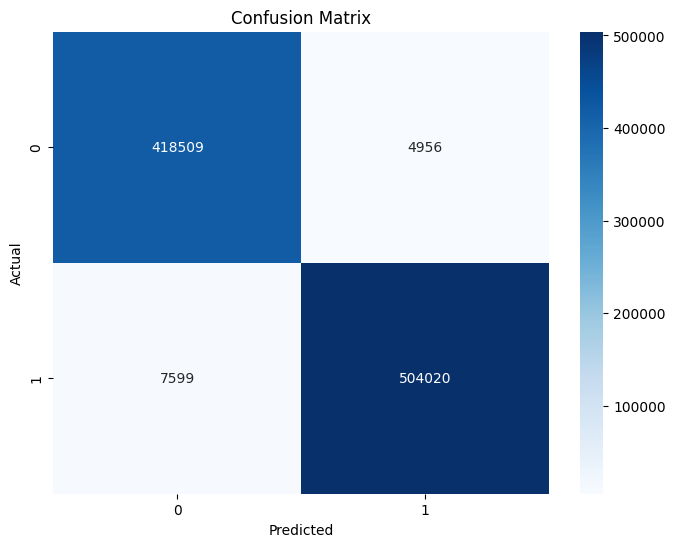

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


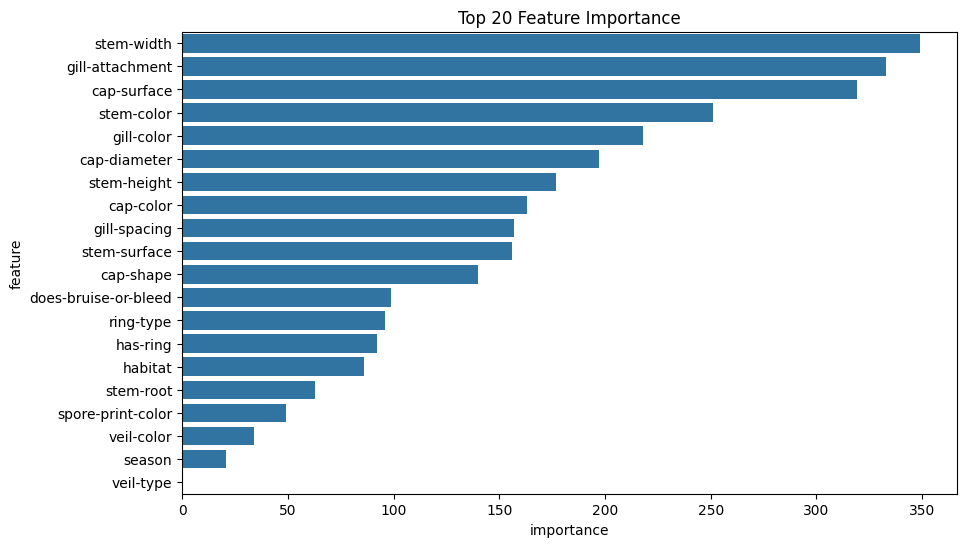

In [ ]:
# Plot feature importance
feature_importance = lgbm.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importance')
plt.show()

## OOB Method

In [39]:
%%time
import ast
models = []
# We have selected top 17 models
list_names = ['Bagging_0', 'Bagging_2', 'CatBoost_3', 'LGBM_0', 'LGBM_1', 'LGBM_2',
       'RandomForest_5', 'RandomForest_7', 'XGB_0', 'XGB_1', 'XGB_2']
N = 17
final_study_values = final_study.head(N)[['name','params']].values
for i in tqdm(range(N)):
    name, params = final_study_values[i]
    if name not in set(list_names):
        continue
    params = ast.literal_eval(params)
    if name[:-2] == 'LGBM':
        model = LGBMClassifier(**params, verbose=-1,random_state=6547)
    elif name[:-2] == 'XGB':
        model = XGBClassifier(**params)
    elif name[:-2] == 'CatBoost':
        model = CatBoostClassifier(**params,iterations=100,verbose=0,random_state = 84987)
    elif name[:-2] == 'DecisionTree':
        model = DecisionTreeClassifier(**params, random_state = 84987)
    elif name[:-2] == 'RandomForest':
        model = RandomForestClassifier(**params, n_estimators = 25, random_state = 84987)
    elif name[:-2] == 'Bagging':
        model = BaggingClassifier(**params, random_state = 84987)
    model.fit(X_train, y_train)
    models.append((name,model))

  0%|          | 0/17 [00:00<?, ?it/s]

CPU times: user 22.9 ms, sys: 1.03 ms, total: 23.9 ms
Wall time: 26.2 ms


In [ ]:
%%time
oob_data = pd.DataFrame()
for name, model in models:
    oob_data[name] = model.predict_proba(X_train)[:,1]
oob_data = oob_data[oob_data.columns.sort_values()]

CPU times: user 26.6 s, sys: 94.1 ms, total: 26.7 s
Wall time: 32.6 s


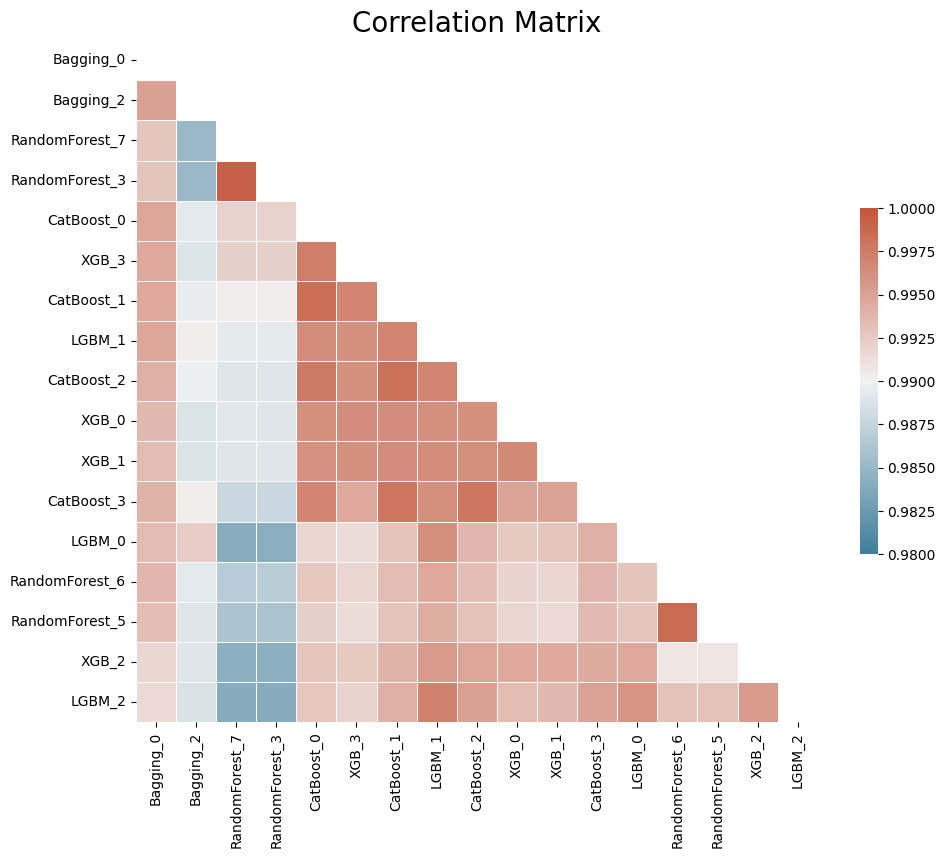

In [ ]:
def create_corr_heatmap(df):
    # Generate a mask for the upper triangle
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=0.98,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    plt.title('Correlation Matrix', fontsize=20)

    plt.savefig(f"output/plots/Correlation matrix_OOB.png")
    plt.show()

create_corr_heatmap(oob_data)

In [ ]:
model_names = ['LGBM_', 'XGB_','CatBoost_','RandomForest_','Bagging_']
keys = [ (1,0),(1,1),(1,2),(1,3)]
select_names = [model_names[i]+ str(j) for i,j in keys ]
final_study[final_study['name'].isin(select_names)][['name', 'train_score','test_score','score', 'margin']]

,name,train_score,test_score,score,margin
5,XGB_3,0.982203,0.977629,0.978536,-0.004574
9,XGB_0,0.977697,0.975415,0.976319,-0.002282
10,XGB_1,0.977466,0.975349,0.976258,-0.002117
15,XGB_2,0.972394,0.971249,0.972071,-0.001144


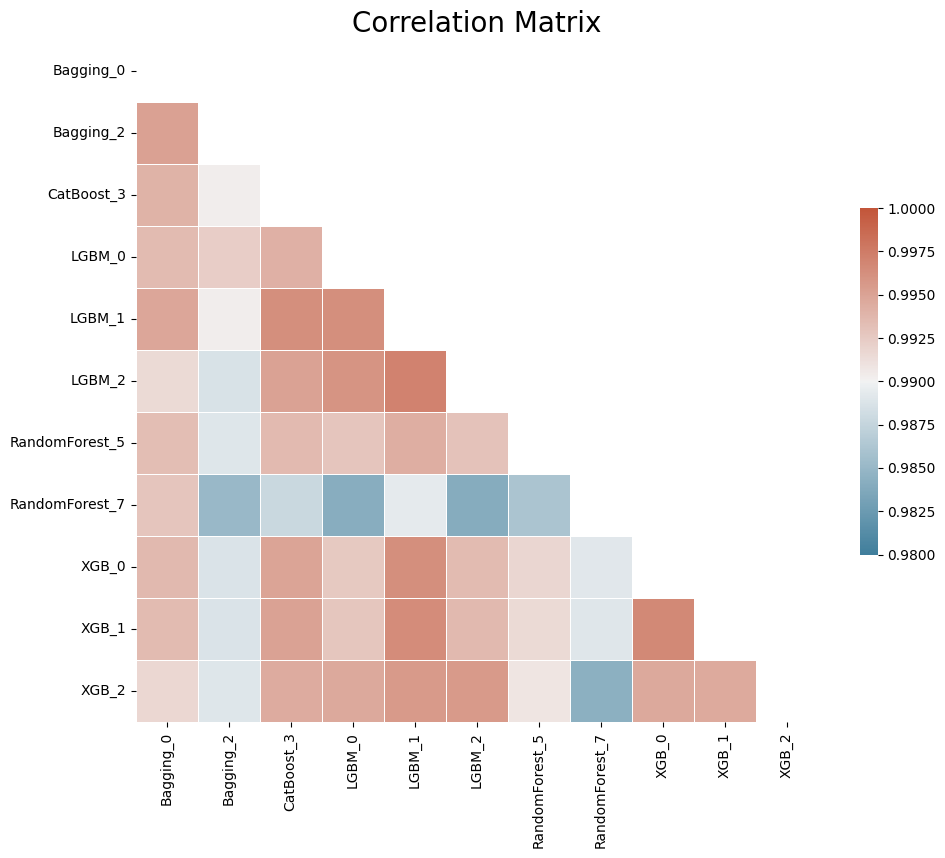

In [ ]:
features = [
           'RandomForest_3', 'RandomForest_6',
           'CatBoost_0', 'CatBoost_1','CatBoost_2',
           'XGB_3'
           ]
create_corr_heatmap(oob_data.drop(features, axis=1))

In [ ]:
oob_filtered = oob_data.loc[:, ~oob_data.columns.isin(features)].copy()
models_filtered = [(name,model) for name, model in models if name not in features]

In [ ]:
linear_model = LinearRegression()
linear_model.fit(oob_filtered, y_train)

LinearRegression()

In [ ]:
# Top important coef_
coef_df = pd.DataFrame({'feature': oob_filtered.columns, 'coef': linear_model.coef_})
coef_df['importance'] = coef_df['coef'].abs()/coef_df['coef'].abs().sum()
coef_df = coef_df.sort_values('importance', ascending=False)
coef_df['cum_importance'] = coef_df['importance'].cumsum()
coef_df.head()

,feature,coef,importance,cum_importance
7,RandomForest_7,1.358752,0.638780,0.638780
6,RandomForest_5,-0.216641,0.101848,0.740627
4,LGBM_1,-0.187713,0.088248,0.828875
5,LGBM_2,0.071880,0.033793,0.862668
3,LGBM_0,0.061128,0.028738,0.891406


In [ ]:
oob_filtered.head()

,Bagging_0,Bagging_2,CatBoost_3,LGBM_0,LGBM_1,LGBM_2,RandomForest_5,RandomForest_7,XGB_0,XGB_1,XGB_2
0,0.009526,0.025049,0.015286,0.045673,0.010899,0.017636,0.008395,0.00,0.006817,0.004640,0.007746
1,0.215054,0.207773,0.171965,0.342611,0.215056,0.208317,0.739325,0.12,0.032555,0.004802,0.050623
2,0.993952,0.985761,0.988100,0.959944,0.990886,0.984554,0.991703,1.00,0.998760,0.994503,0.992378
3,0.077641,0.170324,0.081379,0.055684,0.018157,0.042602,0.073596,0.00,0.013822,0.008020,0.022493
4,0.048470,0.038284,0.012692,0.038770,0.007428,0.012003,0.000769,0.00,0.003538,0.008432,0.014683


In [ ]:
# y_pred = oob_filtered.mean(axis=1).round().astype(int)
y_pred = linear_model.predict(oob_filtered).round().astype(int)

In [ ]:
print(confusion_matrix (y_train, y_pred))
print(matthews_corrcoef(y_train, y_pred))

[[ 95459      1]
 [     4 114536]]
0.9999519851247888


In [ ]:
oob_filtered[oob_filtered['predict']!=oob_filtered['target']]

,Bagging_0,Bagging_2,CatBoost_3,LGBM_0,LGBM_1,LGBM_2,RandomForest_5,RandomForest_7,XGB_0,XGB_1,XGB_2,predict,target
19234,0.263827,0.175462,0.032728,0.051337,0.019874,0.020279,0.020103,0.28,0.010295,0.018365,0.011083,0,1
100701,0.470926,0.359255,0.092505,0.234056,0.136373,0.226239,0.297300,0.40,0.031363,0.111445,0.095227,0,1
115887,0.784229,0.773704,0.743691,0.887095,0.967911,0.956662,0.668714,0.48,0.994082,0.976897,0.912637,0,1
119895,0.345281,0.156542,0.026561,0.112079,0.051528,0.050939,0.077423,0.36,0.117315,0.104724,0.144339,0,1
152465,0.664354,0.561787,0.675139,0.792974,0.873499,0.672273,0.758840,0.64,0.877790,0.761460,0.912119,1,0


In [ ]:
%%time
oob_train = pd.DataFrame()
oob_test = pd.DataFrame()
for i in tqdm(range(len(models_filtered))):
    name, model = models_filtered[i]
    oob_train[name] = model.predict_proba(train.drop('class',axis=1))[:,1]
    # oob_test [name] = model.predict_proba(test)[:,1]

oob_train = oob_train[oob_filtered.columns]
# oob_test = oob_test[oob_filtered.columns]
y_pred_train = linear_model.predict(oob_train).round().astype(int)
# y_pred_test = linear_model.predict(oob_test).round().astype(int)

  0%|          | 0/11 [00:00<?, ?it/s]

CPU times: user 5min 27s, sys: 20.9 s, total: 5min 48s
Wall time: 5min 49s


In [ ]:
print(confusion_matrix(train['class'], y_pred_train))
print(matthews_corrcoef(train['class'], y_pred_train))

[[1395862   15687]
 [  17817 1687579]]
0.9783129976144911


In [ ]:
for i in tqdm(range(len(models_filtered))):
    name, model = models_filtered[i]
    with open(f"output/models/{name}.pkl",'wb') as f:
        pickle.dump(model,f)

  0%|          | 0/11 [00:00<?, ?it/s]

In [ ]:
oob_filtered.columns

Index(['Bagging_0', 'Bagging_2', 'CatBoost_3', 'LGBM_0', 'LGBM_1', 'LGBM_2',
       'RandomForest_5', 'RandomForest_7', 'XGB_0', 'XGB_1', 'XGB_2'],
      dtype='object')

In [23]:
list_names = ['Bagging_0', 'Bagging_2', 'CatBoost_3', 'LGBM_0', 'LGBM_1', 'LGBM_2',
       'RandomForest_5', 'RandomForest_7', 'XGB_0', 'XGB_1', 'XGB_2']
models_retrieved = []
for i in tqdm(range(len(list_names))):
    name = list_names[i]
    with open(f"output/models/{name}.pkl",'rb') as f:
        model = pickle.load(f)
    models_retrieved.append((name,model))

  0%|          | 0/11 [00:00<?, ?it/s]

In [42]:
# oob train
oob_full = pd.DataFrame()
oob_test = pd.DataFrame()
full_trained_models = []
for i in tqdm(range(len(models))):
    name, model = models[i]
    model.fit(train.drop('class',axis=1), train['class'])
    full_trained_models.append((name,model))
    oob_full[name] = model.predict_proba(train.drop('class',axis=1))[:,1]
    oob_test [name] = model.predict_proba(test)[:,1]



  0%|          | 0/11 [00:00<?, ?it/s]

NameError: name 'linear_model' is not defined

In [43]:
linear_model = LinearRegression()
linear_model.fit(oob_full, train['class'])
y_pred_train = linear_model.predict(oob_full).round().astype(int)
y_pred_test = linear_model.predict(oob_test).round().astype(int)

In [24]:
print(confusion_matrix(train['class'], y_pred_train))
print(matthews_corrcoef(train['class'], y_pred_train))

In [44]:
for i in tqdm(range(len(full_trained_models))):
    name, model = full_trained_models[i]
    with open(f"output/full_models/{name}.pkl",'wb') as f:
        pickle.dump(model,f)

  0%|          | 0/11 [00:00<?, ?it/s]

In [45]:
create_submission(test_pred=y_pred_test)

In [ ]:
# optuna objective function for hyperparameter tuning of LGBM
def objective(trial):
    params = {
        'boosting_type'    : trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves'        : trial.suggest_int('num_leaves', 10, 100),
        'max_depth'         : trial.suggest_categorical('max_depth', [-1,3, 4, 5]),
        'learning_rate'     : trial.suggest_float('learning_rate', .001, 2, log=True),
        # 'n_estimators'      : trial.suggest_int('n_estimators', 100, 1000),


        'min_split_gain'    : trial.suggest_float('min_split_gain', 0, 1),
        'min_child_weight'  : trial.suggest_float('min_child_weight', 0, 1),
        'min_child_samples' : trial.suggest_int('min_child_samples', 20, 100),

        'subsample'         : trial.suggest_float('subsample', .4, 1.0),
        'colsample_bytree'  : trial.suggest_float('colsample_bytree', .4, 1.0),

        'reg_alpha'         : trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda'        : trial.suggest_float('reg_lambda', 0, 1),
        }

    model = LGBMClassifier(**params, verbose=-1,random_state=6547)
    model.fit(X_train, y_train)
    return matthews_corrcoef(y_test, model.predict(X_test))


In [ ]:
study_name = 'LGBM'
run_optuna_(study_name, n_trials=10)

## StackingClassifier

## Submission

In [47]:
with mlflow.start_run() as run:
    run_id = run.info.run_id
    mlflow.log_artifact("output")
print(run_id)

2024/08/25 11:36:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run likeable-mink-352 at: https://dagshub.com/SantanuK/Kaggle-Competitions-Lab.mlflow/#/experiments/6/runs/a324bccbbc104fc69adf5e58ba15507b.
2024/08/25 11:36:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/SantanuK/Kaggle-Competitions-Lab.mlflow/#/experiments/6.


a324bccbbc104fc69adf5e58ba15507b


In [111]:
train.to_csv('train_imputed.csv', index=False)
test.to_csv('test_imputed.csv', index=False)

In [112]:
with mlflow.start_run() as run:
    run_id = run.info.run_id
    mlflow.log_artifact("train_imputed.csv")
    mlflow.log_artifact("test_imputed.csv")
print(run_id)

2024/08/25 15:59:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run vaunted-conch-819 at: https://dagshub.com/SantanuK/Kaggle-Competitions-Lab.mlflow/#/experiments/6/runs/520e061c8a1a4dc89e8810713f3eb405.
2024/08/25 15:59:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: https://dagshub.com/SantanuK/Kaggle-Competitions-Lab.mlflow/#/experiments/6.


520e061c8a1a4dc89e8810713f3eb405


In [ ]:
# Prepare submission
sub = pd.read_csv("sample_submission.csv")
def create_submission(model=None, test_pred=None):
    if test_pred is None:
        test_pred = model.predict(test)
    test_pred_labels = le.inverse_transform(test_pred)
    sub['class'] = test_pred_labels
    sub.to_csv('submission.csv', index=False)

In [49]:
!kaggle competitions submit -c $project_name -f submission.csv -m "complex out of box model"

100% 19.8M/19.8M [00:00<00:00, 48.5MB/s]
Successfully submitted to Binary Prediction of Poisonous Mushrooms

In [51]:
!echo $project_name

playground-series-s4e8.zip
